# Initial Exploratory Data Analysis for the HR Separation (hrsepara) project
## Identify the correct working directory for source data
* '/data/discovery/hrsepara/core/'
## Identify the correct working directory for the analysis (both HDFS and LFS)
* '/data/discovery/hrsepara/staging/eda' and  '/home/kesj/working/hrsepara/eda/'
## begin to summarize data 


In [1]:
coredir = '/data/discovery/hrsepara/core/'
stgdir1 = '/data/discovery/hrsepara/staging/eda'
stgdir1local = '/home/kesj/work/hrsepara/eda'


In [2]:
import os,subprocess
import pandas as pd
import numpy as np
%matplotlib inline
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing
from itertools import chain
import random

In [3]:
plt.style.use('fivethirtyeight') # Good looking plots
import seaborn as sns

In [5]:
label_encoder = preprocessing.LabelEncoder() #assigns unique integers to values base upon alphabetical order.

In [4]:
# check if the path exists
os.path.exists(stgdir1local)

True

In [5]:
def hdfs_path_doesnt_exist(path):
    return subprocess.call(['hdfs','dfs','-ls',path])
    # returns 0 if doesnt_exist; 1 otherwise
    

In [8]:
# make the remote directory
if not hdfs_path_doesnt_exist(stgdir1):
    !hdfs dfs -mkdir {stgdir1}

In [6]:
# check if the path exists
if not os.path.exists(stgdir1local):
    # make the local directory
    !mkdir {stgdir1local}
    #'/home/kesj/work/hrsepara/eda'


%pwd
%cd {stgdir1local}
#define the currentworking directory:
cwd = os.path.abspath(os.curdir)
print cwd

/home/kesj/work/hrsepara/eda
/home/kesj/work/hrsepara/eda


## Look at the files in {coredir}

In [7]:
fnames = !hdfs dfs -ls {coredir}
infilenames = [f.split()[-1] for f in fnames[1:]]
print len(infilenames)

16


## May 18, 2015 --> read in the data that has been munged once (by EDA v0.6)
* read in dataframe..
* read 

In [14]:
new_read_dict = {'KEY':np.str,'LOCATION':np.str,'EEO1CODE':np.str,'SKEY':np.str,'JOBCODE':np.str,'EMPL_CLASS':np.str, 
                        'COMPANY':np.str,'EXT_FUNC_ID_SFI':np.str,'FUNC_ID_SFI':np.str,
                          'DIVISION_CODE_SFI':np.str,'JOB_FAMILY':np.str,'JOB_FUNCTION':np.str,'ACTRES1':np.str,
                          'ACTRES2':np.str,'ACTRES3':np.str,'ACTRES4':np.str,'ACTRES5':np.str,'ACTRES6':np.str,
                          'ACTRES7':np.str,'ACTRES8':np.str,'ACTRES9':np.str,'ACTRES10':np.str,'zip5':np.str}
empl = pd.read_csv('employee_dataframe8.tsv',sep='\t',dtype={'KEY':np.str,'SKEY':np.str,'zip5':np.str})#,dtype=new_read_dict)
print empl.shape
empl.head()

(199419, 184)


,ACTRES1,ACTRES10,ACTRES2,ACTRES3,ACTRES4,ACTRES5,ACTRES6,ACTRES7,ACTRES8,ACTRES9,...,Tenure_tdelta,status,Tenure_years,HAVE_INS,HAVE_DEP,DEP_COUNT,sep_status,mar_status,zip5,retired
0,MERIT;WINDOW 2 - EARLY RET INCENTIVE,MERIT,MERIT;MISCELLANEOUS DATA CHANGE;JOB RECLASSIFI...,MERIT;LOCATION/FLOOR CHANGE;JOB RECLASSIFICATION,REVIEW DATE CHANGE;MERIT;RATING SCALE CONVERSION,TRANSFER W/O JOB NUMBER CHANGE;COMPANY WIDE CO...,COST OF LIVING ADJUSTMENT;MERIT,MERIT,MERIT,MERIT,...,"13490 days, 00:00:00",1,36.934366,0,0,0,2,0,35068,1
1,MISCELLANEOUS DATA CHANGE;MISCELLANEOUS DATA C...,MISSING,MISSING,MISSING,MISSING,MISSING,MISSING,MISSING,MISSING,MISSING,...,"206 days, 00:00:00",0,0.564009,0,0,0,0,1,85281,0
2,DISSATISFACTION;COMPANY WIDE CONVERSION;REGION...,TRANSFER W/O JOB NUMBER CHANGE;MERIT;COLA INDI...,MERIT,MERIT,MERIT,MERIT,ORGANIZATIONAL CHANGES;MERIT,MERIT,MERIT,MERIT;PROMOTION,...,"7168 days, 00:00:00",1,19.625317,0,0,0,1,1,43056,0
3,MERIT;WINDOW 4 - EARLY RET INCENTIVE,MERIT;RRTR W/JOB NUMBER CHANGE;COLA INDICATOR ...,MERIT;MISCELLANEOUS DATA CHANGE,MERIT;MISCELLANEOUS DATA CHANGE;MISCELLANEOUS ...,MERIT;MISCELLANEOUS DATA CHANGE;JOB RECLASSIFI...,MERIT;PROMOTION;RATING SCALE CONVERSION,COMPANY WIDE CONVERSION;REGIONAL CONVERSION;CO...,JOB CODE CHANGE;COST OF LIVING ADJUSTMENT;MERIT,MERIT,MERIT;PROMOTION,...,"10763 days, 00:00:00",1,29.468093,1,0,0,2,1,32128,1
4,MISCELLANEOUS DATA CHANGE;SALARY ADJUSTMENT;TR...,MISSING,MISCELLANEOUS DATA CHANGE;MISCELLANEOUS DATA C...,MISCELLANEOUS DATA CHANGE;EMPLOYEE NEW HIRE,MISSING,MISSING,MISSING,MISSING,MISSING,MISSING,...,"752 days, 00:00:00",0,2.058906,1,0,0,0,1,30082,0


#### This input data set has 184 columns

### helper functions

In [8]:
## function to load into pandas from hdfs (by copying to local filespace)
def pandas_read_hdfs(infile,sep = ';',dtype_dict = None):
    # copy the infile to the cwd
    !hdfs dfs -get {infile} .
    # identify the local file name
    inname = infile[infile.rfind('/')+1:]
    # read into a data frame
    if dtype_dict != None:
        df = pd.read_csv(inname,sep=sep,dtype =dtype_dict)
    else:
        df = pd.read_csv(inname,sep=sep)
    # clean up local filespace
    !rm {inname}
    return df

#
def summarize_dataframe2(df,show_example=False,verbose=False):
    nrow = len(df)
    summary_df = pd.DataFrame(columns = ['Column','datatype','nmissing','arity','accepted values'])
    len_df = len(summary_df)
    for col in df.columns:
        nmiss = nrow - df[col].value_counts().sum()
        narity = len(df[col].unique())
        if show_example:
            print col, df[col].dtype,nmiss, "\t", narity,":\t", df[col].ix[8320]
        elif verbose:
            print col, df[col].dtype,nmiss, "\t", narity
        accept_val = None
        if narity < 20:
            accept_val = df[col].unique()
        summary_df.loc[len_df] = [col,df[col].dtype,nmiss,narity,accept_val]
        len_df+=1
    # assing fraction of missing
    summary_df['x_missing'] = summary_df['nmissing']/float(nrow)
    
    return summary_df

## Load the absence (EAS) empl table

In [ ]:
[y for y in abs2['PSL\r\nUSED9'].values if '\r\n' in str(y)]

In [ ]:
## need to clean up column names
#new_cols = [x.strip() for x in 
new_cols = [x.replace('\r\n','').strip() for x in abs2.columns]
abs2.columns= new_cols
abs2.head()

### so again the field formating is wrong -- overflows
* count how many KEYS are NaN

In [ ]:
def join_conseq_rows(df,row_idx):
    idx0 = row_idx -1
    cols_with_missing = df.columns[df.ix[idx0].isnull()]
    cols_with_vals = df.columns[df.ix[row_idx].notnull()]
    if len(cols_with_missing) != len(cols_with_vals):
        print row_idx, len(cols_with_missing),len(cols_with_vals)
    #print len(cols_with_missing),len(cols_with_vals)
    

##MAY 29, 2015 -- using 'EAS' the new file by Ron Davis

In [9]:
infilenames

['/data/discovery/hrsepara/core/EAS',
 '/data/discovery/hrsepara/core/EMPL',
 '/data/discovery/hrsepara/core/HISTCURR',
 '/data/discovery/hrsepara/core/HISTRET',
 '/data/discovery/hrsepara/core/HISTRETold',
 '/data/discovery/hrsepara/core/SBR',
 '/data/discovery/hrsepara/core/SR_BENEFIT.txt',
 '/data/discovery/hrsepara/core/SR_CKE.txt',
 '/data/discovery/hrsepara/core/SR_COMP.txt',
 '/data/discovery/hrsepara/core/SR_CPR.txt',
 '/data/discovery/hrsepara/core/SR_EAS.txt',
 '/data/discovery/hrsepara/core/SR_EDU.txt',
 '/data/discovery/hrsepara/core/SR_INS.txt',
 '/data/discovery/hrsepara/core/SR_LANG.txt',
 '/data/discovery/hrsepara/core/SR_LIC.txt',
 '/data/discovery/hrsepara/core/SR_RELO.txt']

In [16]:
empl_abs = pandas_read_hdfs(infilenames[0],dtype_dict={'KEY':np.str})
empl_abs.shape

(113611, 81)

In [17]:
sdf_abs = summarize_dataframe2(empl_abs)

In [ ]:
empl_abs.columns


In [18]:
[c for c in empl_abs.columns if '\r\n' in c]

[]

In [19]:
sdf_abs[sdf_abs.datatype=='object']

,Column,datatype,nmissing,arity,accepted values,x_missing
0,KEY,object,0,113611,None,0


In [20]:
len(empl_abs.KEY.unique()) == len(empl_abs)

True

In [21]:
missing_keys = []
to_fix_keys = []
for idx,k in enumerate(empl_abs.KEY):
    if (type(k) != np.str):
        missing_keys.append(idx)
    elif len(k) < 14:
        print k
        to_fix_keys.append(idx)
        
print len(missing_keys)

8058149836985
5178574009416
3409033642807
1293681096888
2213933506149
1251156442450
6659541747840
4259289709972
8484540511148
7419561505047
4059639761252
1170580275902
5915414544714
6820313635664
1886047889425
898105558426
6036100911925
5628701767711
6898010152810
8592168338873
2554287203846
4906893710097
4630012905519
4802734127642
7895762104493
4372289871970
2035940066928
1481827814822
3957510927672
2545869910412
4791479559984
583094544980
4257916009174
8933453824806
6848932247073
5807634445749
2365098335950
2787301318155
8046302016846
6805554501156
8302254606179
4618616776829
6356845612804
5813334139908
6994191094765
3353357316625
9527402934398
2426880412934
8195982318463
3766641488190
7158665921147
8961024232656
4257619382934
983867329072
7950098723150
6600471216534
9762328122632
4344806542781
7632222495802
1504398417428
1195676625332
6238172299340
9158407342228
6951938386518
8919234391730
1952187624738
3398570233676
2059222199982
9895477914203
4960965367482
3871684430107
544013176

In [23]:
#[(x,type(x),float(x)) for x in empl_abs.PV_PRE_USED3.values if x != 0.0]
sdf_abs

,Column,datatype,nmissing,arity,accepted values,x_missing
0,KEY,object,0,113611,None,0
1,PDUSED1,float64,0,177,None,0
2,PDUSED2,float64,0,323,None,0
3,PDUSED3,float64,0,319,None,0
4,PDUSED4,float64,0,319,None,0
5,PDUSED5,float64,0,306,None,0
6,PDUSED6,float64,0,314,None,0
7,PDUSED7,float64,0,307,None,0
8,PDUSED8,float64,0,320,None,0
9,PDUSED9,float64,0,329,None,0


In [ ]:
[type(x) for x in empl_abs.PV_PRE_USED3.values if type(x) != 'np.float']

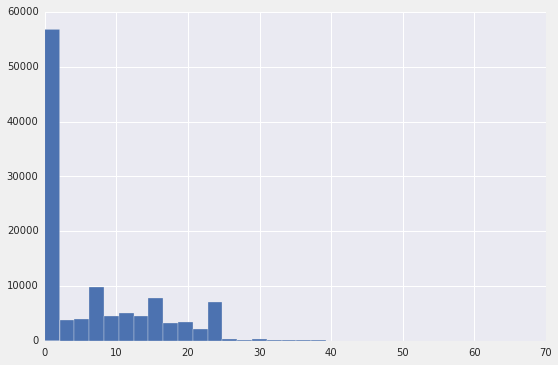

In [24]:
empl_abs['PTBAL1'].hist(bins=30)

## Define types for specific columns

In [10]:
hist_record_dtype_dict = {'KEY':np.str,'LOCATION':np.str,'EEO1CODE':np.str,'SKEY':np.str,'JOBCODE':np.str,'EMPL_CLASS':np.str, 
                          'SHIFT':np.str,'COMPANY':np.str,'EXT_FUNC_ID_SFI':np.str,'FUNC_ID_SFI':np.str,
                          'DIVISION_CODE_SFI':np.str,'JOB_FAMILY':np.str,'JOB_FUNCTION':np.str,'ACTRES1':np.str,
                          'ACTRES2':np.str,'ACTRES3':np.str,'ACTRES4':np.str,'ACTRES5':np.str,'ACTRES6':np.str,
                          'ACTRES7':np.str,'ACTRES8':np.str,'ACTRES9':np.str,'ACTRES10':np.str,'BOX1':np.str,
                          'BOX2':np.str,'BOX3':np.str,'BOX4':np.str,'BOX5':np.str,'BOX6':np.str,'BOX7':np.str,
                          'BOX8':np.str,'BOX9':np.str,'BOX10':np.str,'RATE1':np.str,'RATE2':np.str,'RATE3':np.str,
                          'RATE4':np.str,'RATE5':np.str,'RATE6':np.str,'RATE7':np.str,'RATE8':np.str,'RATE9':np.str,
                          'RATE10':np.str}
#,'COUNT':np.float,'FUNC_CNT':np.float}
#dictionary to load the histcurr and histret columns the same way

In [19]:
empl_df = pandas_read_hdfs(infilenames[1],dtype_dict={'KEY':np.str})
print empl_df.shape
empl_df.head()

(334162, 20)


,KEY,STATE,ADDRESS1,ADDRESS2,POSTAL_SFI,HIRE_DT,LAST_HIRE_DT,SERVICE_DT,SEX,MAR_STA_SNAME_SFI,MAR_STATUS_DT,BIRTHDATE,ETHNIC_GROUP,RELO_STATE_CNT_SFI,RELOCATE_ALL_SFI,TOT_MO_SERVICE_SFI,ADDRCNT1,ADDRCNT3,ADDRCNT5,ADDRCNT10
0,782034519027003,TX,207 BANNER AVE,NaN,78641,20JAN1992,20JAN1992,20JAN1992,M,SINGLE,NaN,30SEP1943,1,0,N,159,0,0,0,0
1,606846618748664,AZ,1441 PANORAMA WAY,NaN,86324,17AUG1987,17AUG1987,17AUG1987,M,MARRIED,NaN,03NOV1942,1,10,N,183,0,0,0,0
2,397026582340257,NC,683 CHELSEA DR,NaN,27332,13MAY1970,13MAY1970,13MAY1970,M,MARRIED,NaN,09MAR1944,1,11,N,349,0,0,0,0
3,932378015449447,NH,97 SHEPHERD RD,NaN,03104,04AUG1969,04AUG1969,04AUG1969,M,MARRIED,NaN,12APR1947,1,24,N,421,0,0,0,0
4,892115452742258,IL,8 BLISS TERRACE,NaN,62234,13JUN1988,13JUN1988,13JUN1988,F,MARRIED,NaN,22OCT1949,1,0,N,295,0,0,0,0


## rename the last 2 columns of HISTCURR to match HISTRET

In [14]:
histcurr_df = pandas_read_hdfs(infilenames[2],dtype_dict=hist_record_dtype_dict)
print histcurr_df.shape#, histcurr_df.columns
# rename the last two columns to match histret
histcurr_df.rename(columns = {'COUNT':'FUNC_CNT','COUNT.1':'EXTFUNC_CNT'},inplace=True)

 (70609, 159)


### load the updated HISTRET file from HDFS

In [15]:
histret_df = pandas_read_hdfs(infilenames[3],dtype_dict=hist_record_dtype_dict)
histret_df.shape#,histret_df.columns

(172554, 160)

In [ ]:
histret_df['JOB_FUNCTION'].unique()

In [ ]:
histret_df.VOLINVOL.value_counts()

#### add a column to histcurr_df corresponding to the new  VOLINVOL column:
* value is 'NOT'

In [ ]:
histcurr_df['VOLINVOL'] = 'NOT'

## Try to join EMPL, HISTCURR & HISTRET

In [13]:
ncurr = len(histcurr_df)
nret = len(histret_df)
print "number of current, separated, total, total_of_interest:",ncurr,nret,len(empl_df),ncurr + nret

number of current, separated, total, total_of_interest: 334162 70609

NameError: name 'empl_df' is not defined

In [ ]:
len(empl_df) - ncurr - nret # these are the canadian and Agency employees

### some helper functions

In [ ]:
# function to truncate POSTAL_ZIP to zip5
def truncate_postal_zip(in_zip):
    try:
        out_zip = in_zip[:5]
        #print out_zip
    except:
        #out_zip = str(in_zip)[:5]
        out_zip = 'XXXXX'# np.nan
    return out_zip

In [ ]:
def summarize_dataframe(df,show_example=False):
    nrow = len(df)
    for col in df.columns:
        nmiss = nrow - df[col].value_counts().sum()
        if show_example:
            print col, df[col].dtype,nmiss, "\t", len(df[col].unique()),":\t", df[col].ix[8320]
        else:
            print col, df[col].dtype,nmiss, "\t", len(df[col].unique())
            
def summarize_dataframe2(df,show_example=False):
    nrow = len(df)
    summary_df = pd.DataFrame(columns = ['Column','datatype','nmissing','arity','accepted values'])
    len_df = len(summary_df)
    for col in df.columns:
        nmiss = nrow - df[col].value_counts().sum()
        narity = len(df[col].unique())
        if show_example:
            print col, df[col].dtype,nmiss, "\t", narity,":\t", df[col].ix[8320]
        else:
            print col, df[col].dtype,nmiss, "\t", narity
        accept_val = None
        if narity < 20:
            accept_val = df[col].unique()
        summary_df.loc[len_df] = [col,df[col].dtype,nmiss,narity,accept_val]
        len_df+=1
    # assing fraction of missing
    summary_df['x_missing'] = summary_df['nmissing']/float(nrow)
    
    return summary_df

### merge the files 
* cur_empl
* ret_empl

In [ ]:
ret_empl = pd.merge(histret_df,empl_df,left_on='KEY',right_on='KEY',how='inner')
cur_empl = pd.merge(histcurr_df,empl_df,left_on='KEY',right_on='KEY',how='inner')
print len(ret_empl),len(cur_empl)

## CLEAN UP THE DATA
### 1. Remove the cases of ON(tario)
### 2. Fill in missing termination, hire and Service dates
### 3. Remove current Interns
### 4. identify 'status' as current (0) or former employee (1).
### 5. Remove negative tenure cases

In [ ]:
print sum(cur_empl.LOC_STATE=='ON'), sum(ret_empl.LOC_STATE == 'ON')
# remove these
ret_empl = ret_empl[ret_empl.LOC_STATE != 'ON'] # drop them

## Check if there are missing termination dates from histret_df?


In [ ]:
sum(ret_empl.TERMINATION_DT.isnull())
#histret_df[histret_df.TERMINATION_DT.isnull()]

### convert the date columns
* import datetime library
* identify the correct columns
* replace nan TERMINATION DATE with Jan, 1, 2015 for cur_empl
* calculate tenure
* calculate age at TERM DATE


In [ ]:
# create list of date columns
date_columns = ['TERMINATION_DT','HIRE_DT','SERVICE_DT','LAST_HIRE_DT','BIRTHDATE']

In [ ]:
##count how many of these are missing
print "Column\t     Current\t Retired"
print "++++++++++++++++++++++++++++++++++++"
for c in date_columns:
    print c, "\t",sum(cur_empl[c].isnull()), "\t",sum(ret_empl[c].isnull())

* replace the missing TERMINATION_DT with '01JAN2015'
* replace the missing HIRE_DT & LAST_HIRE_DT with SERVICE_DT for the Retired employees

In [ ]:
termination_replace_dt = '01JAN2015'
ret_empl['TERMINATION_DT'].fillna(termination_replace_dt,inplace=True)
cur_empl['TERMINATION_DT'].fillna(termination_replace_dt,inplace=True)
#sum(ret_empl['TERMINATION_DT'].isnull())

In [ ]:
#ret_empl[ret_empl['HIRE_DT'].isnull()].HIRE_DT = 
#ret_empl[
missing_idx =ret_empl[ret_empl['HIRE_DT'].isnull()].index
ret_empl.loc[missing_idx,'HIRE_DT'] = ret_empl.loc[missing_idx,'SERVICE_DT']
missing_idx =ret_empl[ret_empl['LAST_HIRE_DT'].isnull()].index
ret_empl.loc[missing_idx,'LAST_HIRE_DT'] = ret_empl.loc[missing_idx,'SERVICE_DT']

In [ ]:
#now convert to datetimes
for c in date_columns:
    ret_empl[c]=ret_empl[c].apply(lambda x:datetime.strptime(x,'%d%b%Y')) 
    cur_empl[c]=cur_empl[c].apply(lambda x:datetime.strptime(x,'%d%b%Y')) 
#ret_empl[date_columns].apply(lambda x: datetime.strptime(x,'%d%b%Y'),axis=0)

In [ ]:
## now calculate age at termination date
cur_empl['Age_tdelta'] = cur_empl['TERMINATION_DT']-cur_empl['BIRTHDATE']#)/np.timedelta64(1,'D')
ret_empl['Age_tdelta'] = ret_empl['TERMINATION_DT']-ret_empl['BIRTHDATE']#)/np.timedelta64(1,'D')## calculate tenure at termination date (use service_date)
# Use HIRE_DATE (SERVICE DATE Can be later than termination date if they have been rehired)
cur_empl['Tenure_tdelta'] = cur_empl['TERMINATION_DT']-cur_empl['HIRE_DT']
ret_empl['Tenure_tdelta'] = ret_empl['TERMINATION_DT']-ret_empl['HIRE_DT']
# convert to days, months or years
cur_empl['Age_years'] = cur_empl['Age_tdelta']/np.timedelta64(1,'Y')
ret_empl['Age_years'] = ret_empl['Age_tdelta']/np.timedelta64(1,'Y')
# convert to months of tenure
cur_empl['Tenure_months'] = cur_empl['Tenure_tdelta']/np.timedelta64(1,'M')
ret_empl['Tenure_months'] = ret_empl['Tenure_tdelta']/np.timedelta64(1,'M')
#cur_empl['Tenure_months'] = cur_empl['Tenure_tdelta']/np.timedelta64(1,'D')



In [ ]:
ret_empl.Age_years.describe(), cur_empl.Age_years.describe()

In [ ]:
ret_empl.Tenure_months.describe(), cur_empl.Tenure_months.describe()

## Prepare for survival analysis:
### Add column (status) to indicate if current (0) or former (1) employee

In [ ]:
ret_empl['status'] = 1
cur_empl['status'] = 0
# now join
print len(ret_empl),len(cur_empl)
empltbl = pd.concat([ret_empl,cur_empl],axis=0)
print len(empltbl)

## Remove 'current' Interns
* identified as those where GRADE == 'UNS'

In [ ]:
pd.crosstab(cur_empl.INTERN, cur_empl.GRADE)

In [ ]:
pd.crosstab(ret_empl.INTERN, ret_empl.GRADE)

* 803 in cur_empl
* 42859 in ret_empl

In [ ]:
empltbl2 = empltbl[empltbl.GRADE != 'UNS'].copy()
len(empltbl2)

In [ ]:
## define interns
interns = empltbl[empltbl.GRADE == 'UNS'].copy()
print len(interns)
interns.Age_years.describe(), interns.Tenure_months.describe()

In [1]:
empltbl2.Tenure_months.describe()

NameError: name 'empltbl2' is not defined

## Deal with negative tenure months

In [ ]:
print "tenure is negative: ", sum(empltbl2.TOT_MO_SERVICE_SFI < 0), sum(empltbl2.Tenure_months < 0)
print "tenure is less than 1 month: ", sum(empltbl2.TOT_MO_SERVICE_SFI < 1), sum(empltbl2.Tenure_months < 1)

In [ ]:
# look at these distributions
plt.figure(figsize=(12,8))
cur_empl.Age_years.hist(bins=80,color='indianred',label='current',alpha=0.8,normed=True)
ret_empl.Age_years.hist(bins=80,color='steelblue',label='retired',alpha=0.5,normed=True)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Normed Counts')
plt.title('Distribution of Worforce Ages')

In [ ]:
neg_tenure_idx = ret_empl[ret_empl.TOT_MO_SERVICE_SFI < 0].index
ret_empl.ix[neg_tenure_idx][['TOT_MO_SERVICE_SFI','Tenure_months','TERMINATION_DT','HIRE_DT','LAST_HIRE_DT','BIRTHDATE']].head(30)

In [ ]:
neg_tenure_idx = ret_empl[ret_empl.Tenure_months < 0].index
ret_empl.ix[neg_tenure_idx][['TOT_MO_SERVICE_SFI','Tenure_months','TERMINATION_DT','HIRE_DT','LAST_HIRE_DT']].tail(30)

In [ ]:
ret_empl.ix[neg_tenure_idx]['KEY'].tail().values

# Cleaning up these dates
### remove the negative tenure cases

In [ ]:
empltbl3 = empltbl2[empltbl2.Tenure_months>=0].copy()
len(empltbl3)

In [ ]:
# how many are younger than 16?
sum(empltbl3.Age_years < 16.01), sum(empltbl3.Age_years > 70)#, sum(cur_empl.Age_years < 16.01)

In [ ]:
# look at these distributions
plt.figure(figsize=(12,8))
empltbl3[empltbl3.status==0].Tenure_months.hist(bins=80,color='indianred',label='current',alpha=0.8,normed=True)
empltbl3[empltbl3.status==1].Tenure_months.hist(bins=80,color='steelblue',label='former',alpha=0.5,normed=True)
plt.legend()
plt.xlabel('Months of Tenure')
plt.ylabel('Normed Counts')
plt.title('Distribution of Worforce Tenures')

In [ ]:
## convert months of tenure to years of tenure
empltbl3['Tenure_years'] = empltbl3['Tenure_months']/12.0

In [ ]:
empltbl3.Tenure_years.describe()

In [ ]:
# look at these distributions
plt.figure(figsize=(12,8))
empltbl3[empltbl3.status==0].Tenure_years.hist(bins=60,range=[0,59],color='indianred',label='current',alpha=0.8,normed=True)
empltbl3[empltbl3.status==1].Tenure_years.hist(bins=60,range=[0,59],color='steelblue',label='former',alpha=0.5,normed=True)
plt.legend()
plt.xlabel('Years of Tenure')
plt.ylabel('Normed Counts')
plt.title('Distribution of Worforce Tenures')

## look for duplicated KEYS (and remove)

In [ ]:
duplicated_keys_list = list(empltbl3.KEY.value_counts()[empltbl3.KEY.value_counts() >1].index)
duplicated_keys_list

In [ ]:
empltbl3.status.value_counts()

## plot age distributions

In [ ]:
empltbl3.Age_years.describe()

In [ ]:
# look at these distributions
plt.figure(figsize=(12,8))
empltbl3[empltbl3.status==0].Age_years.hist(bins=70,range=[15,84],color='indianred',label='current',alpha=0.8,normed=True)
empltbl3[empltbl3.status==1].Age_years.hist(bins=70,range=[15,84],color='steelblue',label='former',alpha=0.5,normed=True)
plt.legend()
plt.xlabel('Age in years')
plt.ylabel('Normed Counts')
plt.title('Distribution of Worforce Ages')

### compare the type of separation

In [ ]:
empltbl3.VOLINVOL.value_counts()

In [ ]:
empltbl3.KEY.nunique()

In [ ]:
## Drop the TOT_MO_SERVICE_SFI column --> it's values seem to be erroneous generally
# drop PER_ORG because it is singly valued
empltbl3.drop(['PER_ORG','TOT_MO_SERVICE_SFI'],axis=1,inplace=True)

## Use this mapping for FLSA N --> 0 , X -->-1 , Z -->1

In [ ]:
empltbl3.FLSA_STATUS.value_counts()

In [ ]:
empltbl3['FLSA_STATUS'] = empltbl3['FLSA_STATUS'].replace({'N':0,'Z':1,'X':-1}).copy()

### Import and join BENEFITS information

In [ ]:
bene_df = pandas_read_hdfs(infilenames[5],dtype_dict={'KEY':np.str})
bene_df.shape

In [ ]:
bene_df.replace({'Y': 1, 'N':0},inplace=True)
bene_df.head()

In [ ]:
#bene_df.columns

In [ ]:
# rename 'COUNT               ' 'DEP_COUNT'
bene_df = bene_df.rename(columns={'COUNT               ':'DEP_COUNT'})

In [ ]:
[sum(bene_df[c].isnull()) for c in bene_df.columns]

In [ ]:
bene_df.HAVE_INS.sum() == len(bene_df)

In [ ]:
empl_bene = pd.merge(empltbl3,bene_df,on='KEY',how = 'left')

In [ ]:
len(empl_bene),empl_bene.VOLINVOL.value_counts()

## Encode some categorical variables that are complete
0. fill in benefit column, missing counts as 0
1. volinvol status  into sep_status
2. MAR_STA_SNAME_SFI into mar_status
3. create a 5code zipcode from POSTAL_SFI (missing flagged as XXXXX)

In [ ]:
empl_bene[bene_df.columns] = empl_bene[bene_df.columns].fillna(0)
empl_bene['DEP_COUNT'].describe()

In [ ]:
#empl_ben
#encode the VOLINVOL column as ['INVOLUNTARY':2,'VOLUNTARY':1,'NOT':0,'
empl_bene['sep_status'] = empl_bene['VOLINVOL'].replace({'NOT':0,'VOLUNTARY':1,'INVOLUNTARY':2,'OTHER':3,'UNKNOWN':3})
print empl_bene.sep_status.value_counts()
empl_bene.drop('VOLINVOL',axis=1,inplace=True)

In [ ]:
## deal with MAR_STA_SNAME_SFI
empl_bene['mar_status'] = empl_bene['MAR_STA_SNAME_SFI'].replace({'MARRIED':0,'SINGLE':1,'LEG SEPAR':2})
#, SINGLE, LEG SEPAR#{'NOT':0,'VOLUNTARY':1,'INVOLUNTARY':2,'OTHER':3,'UNKNOWN':3})
print empl_bene.mar_status.value_counts()
empl_bene.drop('MAR_STA_SNAME_SFI',axis=1,inplace=True)

In [ ]:
## try to deal with location via zipcode
empl_bene['zip5'] = empl_bene['POSTAL_SFI'].apply(lambda(x): truncate_postal_zip(x))
empl_bene.drop('POSTAL_SFI',axis=1,inplace=True)
empl_bene['zip5'].unique()

### assign random numbers to the indices

In [ ]:
import random

In [ ]:
list_of_indices = list(range(empl_bene.KEY.nunique()))
print len(list_of_indices )
random.seed(883321)
#new_indices = [x for x in random.shuffle(list_of_indices)
random.shuffle(list_of_indices)#, len(list_of_indices))

In [ ]:
empl_bene.index = list_of_indices # note that random.shuffle does this shuffling inplace
empl_bene.sort_index(inplace=True)
empl_bene.head()

In [ ]:
#
time_checking_cols = [a for a in date_columns]
time_checking_cols.append('Tenure_months')
time_checking_cols.append('Age_years')
time_checking_cols.append('CUR_LOC_MOS')

In [ ]:
#empl_bene[empl_bene.ACTRES1.isnull()][['LOC_STATE','TERMINATION_DT','HIRE_DT','status','COMPANY','KEY']]

In [ ]:
sdf = summarize_dataframe2(empl_bene)
sdf.sort('x_missing')

# Deal with missing values

In [ ]:
columns_without_missing_values = list(sdf[sdf.x_missing == 0].Column.values)
columns_with_missing_values = list(sdf[sdf.x_missing > 0].Column.values)
print len(columns_with_missing_values), len(sdf)

### so 81 of 186 columns have missing values still. Work on Correcting these.
#### some logic:
* if it is a count (like ADDRCNT*) set missing to -1
* if it is an ACTION REASON, set to 'MISSING' (like ACTRES1)
* if it is a performance assessment (like BOX*) set to 0; L will become 1, S will become 2, H will become 3.
* if it is a float (like MERIT*, PERF*, ...) try to reassign by imputation.
* assign a value:
    * if 'HAVE_INS' or 'HAVE_DEP' assign 0, 0 to values

In [ ]:
chg_to_zero_cols = ['BOX1','BOX2','BOX3','BOX4','BOX5','BOX6','BOX7','BOX8','BOX9','BOX10']
#['HAVE_INS','HAVE_DEP','DEP_COUNT','BOX1','BOX2','BOX3','BOX4','BOX5','BOX6','BOX7','BOX8','BOX9','BOX10']
chg_to_neg_one_cols = ['ADDRCNT1','ADDRCNT3','ADDRCNT5','ADDRCNT10',
                           'DIRECT_RPT_CNT', 'DIVISION_CODE_SFI','EXTFUNC_CNT','FUNC_CNT','TOTAL_RPT_CNT']
                          
chg_to_MISSING_cols = ['ACTRES1','ACTRES2','ACTRES3','ACTRES4','ACTRES5','ACTRES6','ACTRES7','ACTRES8','ACTRES9','ACTRES10',
                      'ADDRESS1','JOB_FAMILY','LOC_CITY','LOC_TYPE_DESCR_SFI','SKEY',
                      'RATE1', 'RATE10', 'RATE2', 'RATE3', 'RATE4', 'RATE5', 'RATE6', 'RATE7', 'RATE8', 'RATE9',]
#chg_to_MISSING =['ACTRES1','ACTRES2','ADDRESS1','JOB_FAMILY', 'LOC_CITY','LOC_TYPE_DESCR_SFI']#'POSTAL_SFI',
chg_to_00000 = ['EXT_FUNC_ID_SFI','FUNC_ID_SFI']#,'zip5']
chg_to_XXX = ['GRADE','JOB_FUNCTION']
chg_to_XX = ['LOC_STATE']
col_to_drop = ['STATE','ADDRESS2','MAR_STATUS_DT'] # drop 'STATE'; some strange values; 'address2 x_missing too high'

In [ ]:
# lump these together
correcting_col_list = [chg_to_zero_cols,chg_to_neg_one_cols,chg_to_MISSING_cols,chg_to_00000,chg_to_XXX,chg_to_XX,col_to_drop]
print sum([len(x) for x in correcting_col_list])

In [ ]:
set_missing_cols_yet_to_fix = set(columns_with_missing_values)-set(chain.from_iterable(correcting_col_list))
print len(set_missing_cols_yet_to_fix)

In [ ]:
replace_float_cols = ['MERIT1', 'MERIT10', 'MERIT2', 'MERIT3', 'MERIT4', 'MERIT5', 'MERIT6', 'MERIT7', 'MERIT8', 'MERIT9', 
                      'PERF1','PERF2','PERF3','PERF4', 'PERF5','PERF6','PERF7','PERF8', 'PERF9', 'PERF10',
                      'SAL10', 'SAL2', 'SAL3', 'SAL4', 'SAL5', 'SAL6', 'SAL7', 'SAL8', 'SAL9']
len(replace_float_cols)

In [ ]:
set_missing_cols_yet_to_fix - set(replace_float_cols) # good empty set.

### apply the logic for the above columns

In [ ]:
replace_code = [0,-1,'MISSING','00000','XXX','XX','drop'] #poor man's dictionary

In [ ]:
empl = empl_bene.copy()
for id,col_list in enumerate(correcting_col_list):
    print id, len(col_list), replace_code[id]
    
    if replace_code[id] == 'drop':
        empl.drop(col_list,axis=1,inplace=True)
        #print col_list
    else:
        empl[col_list]=empl[col_list].fillna(replace_code[id]).copy()

## Create a column for Retired based upon ACTRES1

In [ ]:
## define the possible retire_codes first
## identify unique actres1 listing
# look at the list of ACTRES1 for  ReTIREMENT
uniq_action_reasons_1 = empl.ACTRES1.unique()
print len(uniq_action_reasons_1)
temp_list = [x.split(';') for x in uniq_action_reasons_1]

act_reason_1_list = list(chain.from_iterable(temp_list))
print len(act_reason_1_list)
# identify those that are Retirement related

possible_retire_codes = [x for x in list(set(act_reason_1_list)) if ('RET' in x and  'RETURN' not in x) ]
# If one wants to flag DISABILITY add the next line
#possible_retire_codes.append('DISABILITY')
print len(possible_retire_codes)
possible_retire_codes

In [ ]:
# function to generate flag
def identify_retired(x,ret_codes =possible_retire_codes):
    matched = [a for a in x.split(';') if a in ret_codes]
    if len(matched):
        return 1
    else:
        return 0

In [ ]:
empl['retired'] = empl.ACTRES1.apply(lambda x: identify_retired(x))

## begin to Standardize some of these other columns
1. BOX columns: missing -> 0, L -> 1, S -> 2, H -> 3
2. RATE columns: use dictionary; missing -> 0, 


In [ ]:
### For BOX replace S with 2, H with 3, L with 1
box_col_list = [x for x in empl.columns if x.startswith('BOX')]
print len(box_col_list)
empl[box_col_list] = empl[box_col_list].replace({'H':3,'S':2,'L':1}).copy()
empl[box_col_list].head()

## Simpler conversion of RATE* to 3 levels: Low, Solid or High
dictionary below from Ron Davis

In [ ]:
# dictonary of ratings
ratings_dict = {}
high_ratings = ['R3C3','R3C2','L3EXC','L3-EXC','OTSD','L3PRO','L3-PRO',
                'EXCELS','SUPR','EXC/SUS','EXC/IMP','PEXE','ME - MEETS']
low_ratings = ['IMPR','L1INC','L1DEV','L1PRO','NTAC','R1C2','R1C3','INC/DEC',
               'INC/SUS','INC/IMP','INCNSSTE','L1EXC','UNAC','R1C1','L2-INC','L2INC',
               'L1-EXC','L1-PRO','BEXP','L1-DEV','L1-INC','DNM - DOES','R3C1','R2C1']
solid_ratings = ['R2C3','R2C2','L2EXC','L2PRO','EXPE','/EX/','COMM','AOBJ','EXC/DEC',
                 'PRO/IMP','PRO/SUS','PRO/DEC','SM - SUCCE','MS - MEETS','L2DEV','L3INC',
                 'L3DEV','L2-DEV','L3-INC','ACPT','L3-DEV','L2-EXC','L2-PRO']

# initialize
for rating in high_ratings:
    ratings_dict[rating] = 3
for rating in low_ratings:
    ratings_dict[rating]=1
for rating in solid_ratings:
    ratings_dict[rating]=2

# function for assigning
def assign_simple_rating(x,my_dict = ratings_dict):
    try:
        rval = my_dict[x.strip()]
    except KeyError:
        rval = 0
    return rval


In [ ]:
### For Rate replace solid with 2, High with 3, Low with 1
rate_col_list = [x for x in empl.columns if x.startswith('RATE')]
print len(rate_col_list)
empl[rate_col_list] = empl[rate_col_list].applymap(lambda x: assign_simple_rating(x))
#empl[rate_col_list] = empl[rate_col_list].map(lambda(x): assign_simple_rating(x)).copy()
empl[rate_col_list].head()

In [ ]:
binary_cols = list(sdf[sdf.arity == 2].Column.values)
print binary_cols

In [ ]:
sdf[sdf.arity == 2]

### use scikitlearn to label encode binary features: 
* N--> 0, Y --> 1
* M--> 1, F --> 0
* A-->0, H--> 1

In [ ]:
for col in binary_cols[:-3]:
    empl[col] = label_encoder.fit_transform(empl[col]) # use sklearn.preprocesing.LabelEncoder()

In [ ]:
empl[col].value_counts(), col

In [ ]:
sdf2 = summarize_dataframe2(empl)

In [ ]:
sdf2[sdf2.arity == 19]

###check on various  encoded variables
* arity = 3,Fine
* arity = 4, for 'SHIFT' map 'N' --> 0 and make FULL_PART_TIME categorical
* arity = 5 -- make EMPL_TYPE to categorical
* arity = 6, fine
* arity = 7, make COMPANY categorical
* arity = 8,9,10, fine
* arity = 11: EEO1CODE to categorical
* arity = 12: EMPL_CLASS to categorical
* arity = 19: JOB_FUNCTION to categorical

In [ ]:
### convert shift == N to 0
empl.replace({'SHIFT':{'N':0}},inplace=True)
empl.SHIFT.value_counts()

In [ ]:
cols_to_cat = ['FULL_PART_TIME','EMPL_TYPE','COMPANY','EEO1CODE','EMPL_CLASS','JOB_FUNCTION']
# arity <=19

In [ ]:
empl.FULL_PART_TIME.value_counts()

In [ ]:
empl.COMPANY.value_counts()/len(empl)

In [ ]:
other_categorical_cols = list(sdf2[(sdf2.datatype == 'object') & (sdf2.arity >19)].sort('arity').Column)
other_categorical_cols

In [ ]:
cols_to_encode = other_categorical_cols[:6]
cols_to_encode.append('JOBCODE')
cols_to_encode

In [ ]:
cols_to_ignore = other_categorical_cols[8:]
cols_to_ignore.append('LOC_CITY')
cols_to_ignore

## TRY TO FILL IN MISSING AND non-sense Float values
SAL*, PERF*, MERIT* 

replace_float_cols

In [ ]:
### first identify the missing cases
sum(empl[replace_float_cols[1]].isnull())

In [ ]:
for c in replace_float_cols[:-2]:
    print c, sum(empl[c].isnull())

In [ ]:
sum(empl.FULL_PART_TIME.isnull())

In [ ]:
## save the data
print empl.shape
empl.to_csv('employee_dataframe8.tsv',sep='\t',index=False)

In [3]:
%cd ../../work/hrsepara/eda/
%ls

/home/kesj/work/hrsepara/eda
c2_EAS.ssv                   employee_dataframe.tsv
cp_SR_EAS.txt                employee_df_1.csv
empl1_aaf_1_ci.pkl           employee_df_2.csv
empl_aaf_1_hazards.pkl       employee_table_summary_3.csv
empl_aaf_1.pkl               employee_table_summary.csv
employee_dataframe3.ssv      fourthousand_rfsc1.RData
employee_dataframe4.tsv      fthou_rf_sepTen.RData
employee_dataframe5.tsv      histret_mod
employee_dataframe6.tsv      SBR
employee_dataframe7long.tsv  sbr_mod
employee_dataframe8.tsv      tree.dot
employee_dataframe.ssv       us_unemployment_monthly_seas.csv*


In [ ]:
empl6 = pd.read_csv(

## May 6, 2015.

The above dataset fails to save correctly -- probably too long.
### attempt to encode some of the features already.



# Transform to categorical if <= 19 in arity
* one-hot encoding

In [ ]:
print [(c,len(empl[c].unique())) for c in cols_to_cat]
print "base_categories"
print "------------------------"
[(a,empl[a].value_counts().head(1)) for a in cols_to_cat]

In [ ]:
def create_factorized_df(input_df,column_name):
    tmp_df = pd.get_dummies(input_df[column_name],prefix=column_name)
    # now drop the largest category
    lgst_category = input_df[column_name].value_counts().index[0]
    #print tmp_df.shape, tmp_df.columns
    #print lgst_category
    base_category = column_name+'_'+str(lgst_category)
    tmp_df.drop(base_category,axis=1,inplace=True)
    print tmp_df.shape, base_category
    return tmp_df,base_category
    

In [ ]:
# create a dummified dataframe.
base_category_list =[]
print empl.shape
for acol in cols_to_cat:
    print acol
    t_df,bc1 = create_factorized_df(empl,acol)
    # drop the original column
    empl.drop(acol,inplace=True,axis=1)
    # append the factorized categories
    empl = pd.concat([empl,t_df],axis=1)
    base_category_list.append(bc1)

print empl.shape,len(base_category_list)

### encode the other 'categorical' columns

## just use label_encoding -- need to improve this later


In [ ]:
for col in cols_to_encode:
    print col, len(empl[col].unique())
    empl[col] = label_encoder.fit_transform(empl[col]) # use sklearn.preprocesing.LabelEncoder()

In [ ]:
[x for x in empl.columns if x.startswith('Ten')]

### READ the data May 5, 2015

In [ ]:
empl[empl.columns[182]].head()

In [ ]:
empl2 = pd.read_csv('employee_dataframe8.tsv',sep='\t')
empl2.head(), empl2.shape

In [ ]:
## Look at medians of SAL*
empl.SAL2.describe(), np.median(empl.SAL2)

In [ ]:
## replace by medians -- overal
col_float_medians ={}
for c in replace_float_cols:
    col_float_medians[c] = np.median(empl[c])
    empl[c].fillna(col_float_medians[c],inplace=True)

col_float_medians


## remove high-dimensional categorical data

In [ ]:
empl.drop(cols_to_ignore,inplace=True,axis=1)
empl.shape

# Transform to categorical if <= 19 in arity
* one-hot encoding

In [ ]:
[len(empl[c].unique()) for c in cols_to_cat]

In [ ]:
print "base_categories"
print "------------------------"
[(a,empl[a].value_counts().head(1)) for a in cols_to_cat]

# Now it is ready to use as input into scikitLearn as a matrix
The standard notation is to define this as X and save it as a float type
Don't forget to create a response variable, y

### since the goal is to determine number of separation in a future time point, maybe I should create a target that is the number of tenure years.

## try to apply a rule to grouping categories together
* maybe insure that sum of others <= thresh hold (0.005)


In [ ]:
sdf2[sdf2.Column.isin(cols_to_encode)]

In [ ]:
empl.EXT_FUNC_ID_SFI.value_counts()

In [ ]:
def apply_thresh(series,thresh=0.003,verbose=False):
    myvals = series.value_counts()
    n = len(series)
    my_thresh = thresh*n
    if verbose:
        print "ORIGINAL \n"
        print myvals/n
        print "_++______"
    print "{0} original categories reduced to {1} final categories".format(len(myvals), len(myvals[myvals>my_thresh]))
    catchall = myvals[myvals<=my_thresh]
    
    catchallfrac = catchall.sum()/float(n)
    print "{0} categories grouped into catch-all with {1:.6f} total fraction".format(len(myvals[myvals<=my_thresh]),catchallfrac)
    print "__________________________"
    categories_to_group = list(catchall.index)
    print categories_to_group
    #series[series.isin(categories_to_group)] = 'ZZ_other'
    return categories_to_group
    #print myvals[myvals>my_thresh]
    

In [ ]:
e2 = apply_thresh(empl.LOC_STATE)


In [ ]:
empl.loc[empl.LOC_STATE.isin(e2),'LOC_STATE']='ZZ_other'
empl.LOC_STATE.value_counts()

In [ ]:
#apply_thresh(empl[cols_to_cat[5]])
apply_thresh(empl['EMPL_CLASS'],thresh=0.001,verbose=True)

In [ ]:
empl.LOC_TYPE_DESCR_SFI.value_counts()

In [ ]:
print len(empl[empl.REMOTE==1])
empl[empl.REMOTE==1]['LOC_TYPE_DESCR_SFI'].value_counts()

In [ ]:
empl[empl.JOB_FAMILY == 'CLMREP']['JOBCODE'].value_counts()

In [ ]:
#[sdf[x] for x in sdf.Column if x.endswith('SFI')]
col_end_sfi = [x for x in list(sdf.Column.values) if x.endswith('SFI')]
sdf[sdf.Column.isin(col_end_sfi)]

In [ ]:
empl_bene[empl_bene.EXT_FUNC_ID_SFI=='00000']#.unique()

## get hire year

In [ ]:
atime = empl_bene['HIRE_DT'].ix[0]
str(atime)

In [ ]:
str(atime)[5:7]

In [ ]:
empl_bene['hire_month'] = empl_bene['HIRE_DT'].apply(lambda x: int(str(x)[5:7]))
empl_bene['hire_month'].hist(bins=12,color='darkorchid')

In [ ]:
empl_bene['hire_year'] = empl_bene['HIRE_DT'].apply(lambda x: int(str(x)[:4]))
empl_bene.hire_year.describe()

In [ ]:
empl_bene.hire_year.hist(bins=70)

## how many are there if we require hire_date > some date?


In [ ]:
empl_bene.HIRE_DT.ix[0]

In [ ]:
test_hire_date = pd.to_datetime('2002-11-30') #datetime(2002,11,30)
test_hire_date

In [ ]:
emplB = empl_bene[empl_bene.HIRE_DT > test_hire_date].copy()
print len(emplB)
print emplB.status.value_counts()
print emplB.sep_status.value_counts()


In [ ]:
#test_term_date = #test_hire_date
test_term_date = pd.to_datetime('2002-12-31')
emplC= empl[empl.TERMINATION_DT > test_term_date].copy()
print len(emplC)
print emplC.status.value_counts()
print emplC.sep_status.value_counts()

In [ ]:
emplC.RATE1.value_counts()

In [ ]:
def split_rate_column(x):
    list_of_defined_values = ['R1C1','R1C2','R1C3',
                              'R2C1','R2C2','R2C3',
                              'R3C1','R3C2','R3C3']
    #rcol=[]
    #ccol=[]
    if x in list_of_defined_values:
        rval = int(x[1])#col.append(x[1])
        cval = int(x[3]) #col.append(x[3])
        #print x[1],x[3]
    else:
        #rcol.append(0)
        #ccol.append(0)
        rval = 0
        cval = 0
    return rval,cval

In [ ]:
#rcol,ccol = 
input_column = 'RATE1'
rval = [x[0] for x in emplC[input_column].apply(lambda(x): split_rate_column(x)).as_matrix()]
cval = [x[1] for x in emplC[input_column].apply(lambda(x): split_rate_column(x)).as_matrix()]

In [ ]:
emplC[input_column+'_R'] = rval
emplC[input_column+'_C'] = cval
emplC[['RATE1','RATE1_R','RATE1_C']].head()

In [ ]:
def convert_rate_column(df,input_column):
    rval = [x[0] for x in df[input_column].apply(lambda(x): split_rate_column(x)).as_matrix()]
    cval = [x[1] for x in df[input_column].apply(lambda(x): split_rate_column(x)).as_matrix()]
    df[input_column+'_R'] = rval
    df[input_column+'_C'] = cval
    df.drop(input_column,inplace=True,axis=1)
    return df

In [ ]:
### convert the RATINGS columns
for col in ['RATE1','RATE2','RATE3','RATE4','RATE5','RATE6','RATE7','RATE8','RATE9','RATE10']:
    print col
    emplC = convert_rate_column(emplC,col)

In [ ]:
emplC.shape

## begin to Standardize some of these other columns



In [ ]:
empltbl3.EMPL_CLASS.value_counts(), empltbl3.EMPL_CLASS.unique()

In [ ]:
empltbl3.EMPL_TYPE.value_counts()

In [ ]:
pd.crosstab(empltbl3.EMPL_TYPE,empltbl3.EMPL_CLASS)

In [ ]:
pd.crosstab(empl.COMPANY,empl.EMPL_TYPE)

In [ ]:
pd.crosstab(empl.COMPANY,empl.EMPL_CLASS)

In [ ]:
pd.crosstab(emplC.COMPANY,emplC.EMPL_CLASS)

In [ ]:
empl[empl.COMPANY=='049'].LOC_STATE.value_counts()

In [ ]:
empl.COMPANY.value_counts()

In [ ]:
sdfC[sdfC.arity>4].sort('arity')

In [ ]:
print len(empltbl3.LEGACY_DEPT_SFI.unique())

In [ ]:
empltbl3.LEGACY_DEPT_SFI.value_counts()

In [ ]:
sdfC[sdfC['arity']<40000].sort('arity',ascending=False)

In [ ]:
len(empltbl3.LOCATION.unique()

In [ ]:
Bcolumns_without_missing_values = list(sdfB[sdfB.x_missing == 0].Column.values)
Bcolumns_with_missing_values = list(sdfB[sdfB.x_missing > 0].Column.values)
print len(Bcolumns_with_missing_values), len(sdfB)

In [ ]:
sdfB.sort('x_missing',ascending=False)

In [ ]:
sdf2 = summarize_dataframe2(empl)

In [ ]:
sdf2['x_missing'] = sdf2['nmissing']/len(empl)
sdf2.sort('x_missing',ascending=False)

In [ ]:
columns_with_missing_values2 = list(sdf2[sdf2.x_missing>0].Column.values)
len(columns_with_missing_values2)

In [ ]:
sdf2[(sdf2.x_missing>0) & (sdf2.datatype != 'float64')]#.datatype.unique()

In [ ]:
print len(empl.RATE1.unique()), 
print empl.RATE1.unique()

In [ ]:
empl.RATE1.value_counts()

In [ ]:
len(empl[empl.RATE1 == 'R3C1'])

In [ ]:
empl[empl.RATE1 == 'COMM']['TERMINATION_DT'].describe()#max()#[['hire_year','TERMINATION_DT','status','sep_status']]

In [ ]:
print sum(empl_bene.MAR_STATUS_DT.isnull())
empl_bene[empl_bene.MAR_STATUS_DT.isnull()][['HIRE_DT','TERMINATION_DT','MAR_STA_SNAME_SFI']]

In [ ]:

#empl_bene.drop('STATE',axis=1,inplace=True)
#pd.crosstab(empl_bene['STATE'],empl_bene['LOC_STATE'])

In [ ]:
set(columns_with_missing_values)-set(Bcolumns_with_missing_values)

In [ ]:
# look at these distributions
plt.figure(figsize=(12,8))
emplC[emplC.status==0].Age_years.hist(bins=70,range=[15,84],color='darkred',label='current',alpha=0.8,normed=True)
emplC[emplC.status==1].Age_years.hist(bins=70,range=[15,84],color='dodgerblue',label='former',alpha=0.5,normed=True)
plt.legend()
plt.xlabel('Age in years')
plt.ylabel('Normed Counts')
plt.title('Distribution of Worforce Ages')

In [ ]:
# look at these distributions
plt.figure(figsize=(12,8))
emplB[emplB.status==0].Tenure_years.hist(bins=36,range=[0,35],color='darkred',label='current',alpha=0.8,normed=True)
emplB[emplB.status==1].Tenure_years.hist(bins=36,range=[0,35],color='dodgerblue',label='former',alpha=0.5,normed=True)
plt.legend()
plt.xlabel('Age in years')
plt.ylabel('Normed Counts')
plt.title('Distribution of Worforce Ages')

In [ ]:
empl_bene.zip5.value_counts()

In [ ]:
label_encoder.fit_transform(empl_bene['SEX'])
#empl_bene.SEX.head() #df['State'] = label_encoder.fit_transform(df['State'])

In [ ]:
empl_bene['COMP_FREQ_HOURLY'] = label_encoder.fit_transform(empl_bene['COMP_FREQUENCY'])
empl_bene.drop([],axis=1,inplace=True)


In [ ]:
empl_bene.COMP_FREQUENCY.head()

In [ ]:
##
empl_bene['COMP_FREQ_ANNUAL'] = 1
empl_bene.loc[empl_bene['COMP_FREQUENCY']=='H','COMP_FREQ_ANNUAL'] = 0
empl_bene.drop('COMP_FREQUENCY',axis=1,inplace=True)

## Save this dataframe as a tab separated file

In [ ]:
outfile1 = 'employee_dataframe.tsv'
save_dataframe_file = True
if save_dataframe_file:
    empltbl3.to_csv(outfile1,sep='\t')

## convert datetime64[ns] format to a string ---> YYYY-MM-DD 
use date_columns

In [ ]:
for c in date_columns:
    empltbl3[c]= empltbl3[c].apply(lambda x: str(x).split(' ')[0])

In [ ]:
for col in empltbl3.columns:
    my_dtype = empltbl3[col].dtype
    if my_dtype != 'object' and my_dtype != 'float64' and my_dtype != 'int64':
        print col, "\t", empltbl3[col].dtype, "\t",empltbl3[col].ix[8] 

In [ ]:
### try converting the timedeltas to floats
empltbl3['Age_tdelta'].ix[3].astype('float')/(60*60*24*10**9)

In [ ]:
nano2days = 60.*60.*24.*10**9
empltbl3['Age_days'] = empltbl3['Age_tdelta'].apply(lambda x: x.astype('float')/(nano2days))
empltbl3['Tenure_days'] = empltbl3['Tenure_tdelta'].apply(lambda x: x.astype('float')/(nano2days))

In [ ]:
empltbl3.drop(['Age_tdelta','Tenure_tdelta'], axis=1,inplace=True)
empltbl3.shape

In [ ]:
len(empltbl3.Age_days.unique()), len(empltbl3.Tenure_days.unique())

In [ ]:
empltbl.Age_years.ix[:10].apply(lambda x: int(np.round(x,0)))

In [ ]:
# Keep just the year
empltbl_dates = empltbl[date_columns].copy() # save the dates.
for c in date_columns:
    #print c
    if c.endswith('DT'):
        c2 = c[:-2]+'YEAR'
    else:
        c2 = c[:-4]+'_YEAR'
    #print c2
    empltbl[c2]= empltbl[c].apply(lambda x: x[:4])

In [ ]:
empltbl.drop(date_columns,axis=1,inplace=True)

In [ ]:
empltbl['Age_year_int'] = empltbl['Age_years'].apply(lambda x: int(np.round(x,0)))
empltbl['Tenure_year_int'] = empltbl['Tenure_months'].apply(lambda x: int(np.round(x/12,0)))

In [ ]:
len(empltbl.Age_year_int.unique()), len(empltbl.Tenure_year_int.unique())

In [ ]:
empltbl.Tenure_year_int.value_counts().plot(kind='bar',color='darkslateblue')

In [ ]:
#now save this version for H2O
outfile2 = 'employee_dataframe2.ssv'
save_dataframe_file = True
if save_dataframe_file:
    empltbl.to_csv(outfile2,sep=';')

In [ ]:
empltbl.shape

In [ ]:
# duplicated employee keys:
#[empltbl.KEY.value_counts() > 1]
dup_empl_keys = []
empltblKEYcounts = empltbl.KEY.value_counts()
for a in empltblKEYcounts[empltblKEYcounts>1].index:
    print a
    dup_empl_keys.append(a)

for empkey in dup_empl_keys:
    print empltbl[empltbl.KEY == empkey]

## Continue to Refine the input data

In [ ]:
sum(empltbl3.zip5.isnull())

In [ ]:
empltbl3[empltbl3.zip5=='SW18 '].values

In [ ]:
empltbl3[empltbl3['STATE'].isnull()][['POSTAL_SFI','zip5','LOC_STATE','ADDRESS1']]

In [ ]:
sdf = summarize_dataframe2(empltbl3)

## Examine cleaning up the different feature (covariate) columns for anylysis on them.


### restrict the dataframe to do linear-regression on.
* first attempt is _ad hoc_ reduction of 185 columns
    * keep age_years, tenure_months, status, sex for sure
* look at cases where there is 'significant' correlation between columns:
    * for example JOBCNTx, LOCCNTx, DEPTCNTx, ...

In [ ]:
# define the set of columns that have missing values smaller than some threshold 
sdf['x_missing'] = sdf['nmissing']/len(empltbl3)
len(sdf[sdf['x_missing'] > 0]), len(sdf)

In [ ]:
sdf['y_arity'] = sdf['arity']/len(empltbl)
sdf['y_arity'].hist(bins=30,color='deepskyblue')

In [ ]:
sdf['x_missing'].hist(bins=30,color='deeppink')

In [ ]:
sdf.to_csv('employee_table_summary_3.csv')
# save to file

In [ ]:
len(sdf)

In [ ]:
# now apply some logic to these columns for keeping and not
columns_to_fix_missing = []
columns_to_fix_NY = []
columns_to_omit = []

### Procedure applies:
* Omit those that more than 25% missing.
* identify those that have between 0.1% and 25% missing
* add back in 2 columns of interest:
* Fix the missing values (imputation):
    - if categorical create new column
    - if float/int assign median
* convert Y/N to 1/0
* convert other columns



In [ ]:
# omit those that have more than 25% missing:
missing_threshold = 0.25
columns_to_omit = list(sdf[sdf['x_missing'] > missing_threshold].Column.values)
print len(columns_to_omit)
#columns_to_omit

In [ ]:
#missing_threshold = 0.25
print len(sdf[(sdf['x_missing']>0) & (sdf['x_missing'] <= missing_threshold)])
columns_to_fix_missing = list(sdf[(sdf['x_missing']>0) & (sdf['x_missing'] <= missing_threshold)].Column.values)
#print len(columns_to_fix_missing)

In [ ]:
# add JOB_FAMILY and JOB_FUNCTION back into those to keep
job_columns_of_interest = ['JOB_FAMILY','JOB_FUNCTION']
for jcol in job_columns_of_interest:
    columns_to_omit.remove(jcol)
    columns_to_fix_missing.append(jcol)

len(columns_to_omit), len(columns_to_fix_missing)

### look at the ones to fix missing that are objects

In [ ]:
sdf[sdf.Column.isin(columns_to_fix_missing)]

In [ ]:
#sdf.ix[columns_to_fix_missing.index].datatype.value_counts()
sdf[sdf.Column.isin(columns_to_fix_missing)].datatype.value_counts()

## Logic to fix the missing (objects)

In [ ]:
sdf[(sdf.Column.isin(columns_to_fix_missing)) & (sdf.datatype == 'object')]

In [ ]:
## try to compare state & loc_state to resolve
len(empltbl3[(empltbl3.STATE.isnull()) & (empltbl3.LOC_STATE.isnull())])

In [ ]:
empltbl3.LOC_TYPE_DESCR_SFI.ix[:10]

### only 62 have both LOC_STATE and STATE missing --> compare the values of each

In [ ]:
len(empltbl3[(empltbl3.STATE!= empltbl3.LOC_STATE)][['STATE','LOC_STATE','zip5','LOC_CITY']])

In [ ]:
print len(empltbl3[(empltbl3.STATE.isnull()) & (empltbl3.LOC_STATE.notnull())][['STATE','LOC_STATE','zip5','LOC_CITY']])
empltbl3[(empltbl3.STATE.isnull()) & (empltbl3.LOC_STATE.notnull())][['STATE','LOC_STATE','zip5','LOC_CITY']]

* ACTRES1,ACTRES2,'ADDRESS1 --> to 'MISSING'
* EXT_FUNC_ID_SFI,FUNC_ID_SFI,zip5 --> XXXXX
* GRADE_JOB_FUNCTION --> XXX

In [ ]:
chg_to_MISSING =['ACTRES1','ACTRES2','ADDRESS1','POSTAL_SFI','JOB_FAMILY', 'LOC_CITY','LOC_TYPE_DESCR_SFI']
chg_to_XXXXX = ['EXT_FUNC_ID_SFI','FUNC_ID_SFI','zip5']
chg_to_XXX = ['GRADE','JOB_FUNCTION']
chg_to_XX = ['STATE','LOC_STATE']

In [ ]:
#'MISSING' in empltbl3.LOC_STATE.unique()
#empltbl3.LOC_STATE.ix[:10]
for acolumn in chg_to_MISSING:
    empltbl3.fillna({acolumn: 'MISSING'},inplace=True)

for acolumn in chg_to_XXXXX:
    empltbl3.fillna({acolumn: 'XXXXX'},inplace=True)

for acolumn in chg_to_XXX:
    empltbl3.fillna({acolumn: 'XXX'},inplace=True)

for acolumn in chg_to_XX:
    empltbl3.fillna({acolumn: 'XX'},inplace=True)


* DIVISION_CODE_SFI --> 15 missing replace with -1 and cast as int

In [ ]:
empltbl3.fillna({'DIVISION_CODE_SFI': -1},inplace=True)
empltbl3['DIVISION_CODE_SFI'] = empltbl3['DIVISION_CODE_SFI'].apply(lambda x: int(x)) 
empltbl3.DIVISION_CODE_SFI.ix[:10]

In [ ]:
### Now for non-objects that were missing:
sdf[(sdf.Column.isin(columns_to_fix_missing)) & (sdf.datatype == 'float64')]

###  logic
* change a few floats to ints:
    - ADDRCNT1,ADDRCNT10,ADDRCNT3,ADDRCNT5,EXTFUNC_CNT,FUNC_CNT
    - assign -1 to missing
* replace missing with median for others (PERF, MERIT, SAL)

In [ ]:
missing_float_to_int = ['ADDRCNT1','ADDRCNT10','ADDRCNT3','ADDRCNT5','EXTFUNC_CNT','FUNC_CNT']
for acolumn in missing_float_to_int:
    empltbl3.fillna({acolumn: -1},inplace=True)
    empltbl3[acolumn] = empltbl3[acolumn].apply(lambda x: int(x)) 
    

In [ ]:
missing_float_to_median = list(sdf[(sdf.Column.isin(columns_to_fix_missing)) & (sdf.datatype == 'float64')].Column[6:].values)

In [ ]:
missing_median_values_series = empltbl3[missing_float_to_median].median()
missing_median_values_series.head()

In [ ]:
missing_median_values_series.loc['PERF4']

In [ ]:
for acolumn in missing_float_to_median:
    med_value = missing_median_values_series.loc[acolumn]
    print acolumn, med_value
    empltbl3.fillna({acolumn:med_value},inplace=True)

### Again from an  __ad hoc__ perspective, reduce the number of columns.
The reasoning being that the data is historical or potentially redundant (e.g. Tenure_tdelta + Tenure_years)

In [ ]:
# add the ACTRES2/3 and ADDRESS1/2 lines
# add *_tdelta, BIRTHDATE, PER_ORG
# add POSTAL_SFI, zip5, MAR_STA_SNAME_SFI, LOC_TYPE_DESC_SFI
others_to_omit = ['ADDRESS1','Age_tdelta','BIRTHDATE','LAST_HIRE_DT',
                  'LOC_CITY','LOC_TYPE_DESCR_SFI','MAR_STATUS_DT','MAR_STA_SNAME_SFI',
                  'PER_ORG','POSTAL_SFI','SKEY','SERVICE_DT','TERMINATION_DT',
                  'Tenure_tdelta','zip5']#'TOT_MO_SERVICE_SFI','Tenure_months']
                 #'MERIT1','MERIT2','MERIT3','MERIT4','MERIT5','MERIT6','MERIT7','MERIT8','MERIT9','MERIT10',
                 #'PERF1','PERF2','PERF3','PERF4','PERF5','PERF6','PERF7','PERF8','PERF9','PERF10']
history_to_omit = ['ADDRCNT10','ADDRCNT3','ADDRCNT5','DEPTCNT10','DEPTCNT3','DEPTCNT5',
                   'EFUNCCNT10','EFUNCCNT3','EFUNCCNT5','FLOORCNT10','FLOORCNT3','FLOORCNT5',
                  'FTPTCNT10','FTPTCNT3','FTPTCNT5','FULLPART10','FULLPART3','FULLPART5',
                  'FUNCCNT10','FUNCCNT3','FUNCCNT5','GRADECNT10','GRADECNT3','GRADECNT5',
                  'JOBCNT10','JOBCNT3','JOBCNT5','LOCCNT10','LOCCNT3','LOCCNT5','LOCSTCNT10','LOCSTCNT3','LOCSTCNT5',
                  'PARTFULL10','PARTFULL3','PARTFULL5','PTFTCNT10','PTFTCNT3','PTFTCNT5',
                   'SUPVCNT10','SUPVCNT3','SUPVCNT5','ACTRES2','SAL10','SAL9','SAL8','SAL7','SAL6','SAL5','SAL4','SAL3',
                   'SAL2','MERIT2','MERIT3','MERIT4','MERIT5','MERIT6','MERIT7','MERIT8','MERIT9','MERIT10',
                    'PERF2','PERF3','PERF4','PERF5','PERF6','PERF7','PERF8','PERF9','PERF10']
cols_to_categorical = ['COMPANY','COMP_FREQUENCY','DIVISION_CODE_SFI','EEO1CODE','EMPL_CLASS','EMPL_TYPE','ETHNIC_GROUP',
                       'FLSA_STATUS','FULLPART1','FULL_PART_TIME','GRADE','HUBIND','INTERN','JOB_FUNCTION','RELOCATE_ALL_SFI',
                       'REMOTE','REMOTE_SUPV','SEX','SHIFT','SUPV_DIFF_LOC','VOLINVOL','status']
for col in others_to_omit:
    columns_to_omit.append(col)

for col in history_to_omit:
    columns_to_omit.append(col)
    
print len(columns_to_omit),len(cols_to_categorical)

In [ ]:
# define columns to keep
columns_to_keep = list(set(empltbl3.columns)-set(columns_to_omit))
len(columns_to_keep)

In [ ]:
empltbl4 = empltbl3[columns_to_keep].copy()
print empltbl4.shape

In [ ]:
sdf4 = summarize_dataframe2(empltbl4)

## convert binary columns to 0,1 in empl_bene and save

In [ ]:
[sum(empl_bene[c].isnull()) for c in columns_to_fix_NY]

In [ ]:
for c in columns_to_fix_NY:
    if c == 'SEX':
        empl_bene.replace({c:{'M':0,'F':1}},inplace=True)
    else: 
        empl_bene.replace({c:{'N':0,'Y':1}},inplace=True)
        
empl_bene.INTERN.value_counts()

In [ ]:
pd.crosstab(empl_bene.FULLPART1,empl_bene.PARTFULL1)

In [ ]:
empl_bene['COMP_FREQ_ANNUAL'] = 1
empl_bene.loc[empl_bene['COMP_FREQUENCY']=='H','COMP_FREQ_ANNUAL'] = 0
empl_bene.drop('COMP_FREQUENCY',axis=1,inplace=True)

In [ ]:
empl_bene.to_csv('employee_dataframe7long.tsv',sep='\t',index=False)

In [ ]:
save_this_file = True
if save_this_file:
    empltbl4.to_csv('employee_dataframe4.tsv',sep='\t',ignore_index =True)

In [ ]:
sdf4[sdf4.arity==2]

In [ ]:
empltbl4.shape

In [ ]:
empltbl4.SHIFT.value_counts()

### Logic to transform the binary categorical columns
* column = SEX; 1 = Male, 0 = female
* column = COMP_FREQUENCY --> new column: comp_frequency_annual (1 = A, 0 = H (hourly))
* other columns Y == 1, N == 0

In [ ]:
empltbl4['COMP_FREQ_ANNUAL'] = 1
empltbl4.loc[empltbl4['COMP_FREQUENCY']=='H','COMP_FREQ_ANNUAL'] = 0
empltbl4.drop('COMP_FREQUENCY',axis=1,inplace=True)

# now deal with male,female
empltbl4.replace({'SEX':{'M': 1,'F':0}},inplace=True)
empltbl4[['COMP_FREQ_ANNUAL','SEX','SHIFT']].head()

In [ ]:
# assign 1 to Y, 0 to N for the following columns
columns_to_fix_NY = ['INTERN','FULLPART1','RELOCATE_ALL_SFI','HUBIND','REMOTE','REMOTE_SUPV','SUPV_DIFF_LOC','PARTFULL1']
#empltbl4['COMP_FREQ_ANNUAL'] = empltbl4[
for acol in columns_to_fix_NY:
    empltbl4.replace({acol :{'Y':1,'N':0}},inplace=True) 

In [ ]:
sdf4

In [ ]:
sdf4[(sdf4.datatype=='object') &(sdf4.arity > 2)]

In [ ]:
pd.crosstab(empltbl4.VOLINVOL,empltbl4.sep_status)

In [ ]:
sum(empltbl4.sep_status <=1)

In [ ]:
vc_empl4 = empltbl4[empltbl4.sep_status<=1].copy()


In [ ]:
kmf_vc = KaplanMeierFitter()
kmf_vc.fit(vc_empl4.Tenure_months, vc_empl4.status,label='ALL')
kmf_vc.plot(color='darkslateblue')
plt.ylabel('Survival Function')
plt.xlabel('Tenure_months')

In [ ]:
vc_empl4.JOB_FUNCTION.value_counts()

In [ ]:
### Repeat for mgrs
print mg_codes
mgr = empltbl3.GRADE.isin(mg_codes)
sum(mgr)

In [ ]:
#sum(vc_empl4[
print len(vc_empl4[vc_empl4.GRADE.isin(mg_codes)])
mgrA = vc_empl4.GRADE.isin(mg_codes)

In [ ]:
fig = plt.figure(figsize=(12.5,5))

kmf_mgr1=KaplanMeierFitter()

kmf_mgr1.fit(vc_empl4[mgrA].Tenure_months, timeline=tenure_month_range, event_observed=vc_empl4[mgrA].status,label='managers')
mgrA_sf_df = pd.DataFrame(kmf_mgr1.survival_function_)
ax = fig.add_subplot(111)
kmf_mgr1.plot(ax=ax,c='darkgreen')
kmf_mgr1.fit(vc_empl4[~mgrA].Tenure_months, timeline=tenure_month_range,event_observed=vc_empl4[~mgrA].status,label='non-managers')
kmf_mgr1.plot(ax=ax,color='darkslategray')
mgrA_sf_df = pd.concat([mgrA_sf_df,kmf_mgr1.survival_function_],axis=1)
plt.ylim(0,1.05)
plt.ylabel('Survival Distribution Function')
plt.xlabel('Tenure Months')

In [ ]:
pb = vc_empl4.GRADE.isin(pb_codes)
fig = plt.figure(figsize=(12.5,5))

kmf_grade=KaplanMeierFitter()

kmf_grade.fit(vc_empl4[pb].Tenure_months, timeline=tenure_month_range, event_observed=vc_empl4[pb].status,label='PB')
#grade_sf_df = pd.DataFrame(kmf_grade.survival_function_)
ax = fig.add_subplot(111)
kmf_grade.plot(ax=ax,c='deepskyblue')
kmf_grade.fit(vc_empl4[~pb].Tenure_months, timeline=tenure_month_range,event_observed=vc_empl4[~pb].status,label='non PB')
kmf_grade.plot(ax=ax,color='darkslategray')
plt.ylim(0,1.05)
plt.ylabel('Survival Distribution Function')
plt.xlabel('Tenure Months')

In [ ]:
kmf_grade.fit(vc_empl4[pb].Tenure_months, timeline=tenure_month_range, event_observed=vc_empl4[pb].status,label='PB')
kmf_grade.survival_function_

In [ ]:
print pb_codes
sum(pb)

In [ ]:
mgrA_sf_df 

In [ ]:
def lin_interpolate_df(df,index_to_find):
    #x1,x2 = locate_closest_indices(df,x)
    my_min = df.ix[:index_to_find].index[-1]
    my_max = df.ix[index_to_find:].index[0]
    deltax = my_max-my_min
    #print my_min, my_max
    y_1 = df.ix[my_min]
    y_2 = df.ix[my_max]
    #print y_1, y_2
    
    deltay=df.ix[my_max]- y_1
    slope = deltay/deltax
    #print slope, deltax, deltay
    my_value = y_1+slope*(index_to_find-my_min)
    return my_value

In [ ]:
def calc_future_survival_proba(input_df,grp,sf_df,future_year_list):
    ## define a new data frame to hold the information
    current_tenure = input_df[grp][input_df.status==0].Tenure_months.copy()
    #current_mgr.columns='Current_tenure'#,inplace=True)
    new_df = pd.DataFrame()
    for future_year in future_years_list:
        cname = 'plus_'+str(future_year)+'yr'
        survival_prob = [lin_interpolate_df(sf_df,x) for x in current_tenure.values+future_year*12.0]
        a_df = pd.DataFrame(survival_prob,columns=[cname])
        new_df = pd.concat([new_df,a_df],axis=1)
    
    print new_df.shape
    return new_df

## this is alternatively able to be done by doing sum(kmf.predict(current.Tenure_months+t))/len(current)

In [ ]:
mgrA_sf_df['managers']

In [ ]:
fig = plt.figure(figsize=(12.5,5))

kmf_mgr1=KaplanMeierFitter()

kmf_mgr1.fit(vc_empl4[mgrA].Tenure_months, timeline=tenure_month_range, event_observed=vc_empl4[mgrA].status,label='managers')
mgrA_sf_df = pd.DataFrame(kmf_mgr1.survival_function_)
ax = fig.add_subplot(111)
kmf_mgr1.plot(ax=ax,c='darkgreen')
kmf_mgr1.fit(vc_empl4[~mgrA].Tenure_months, timeline=tenure_month_range,event_observed=vc_empl4[~mgrA].status,label='non-managers')
kmf_mgr1.plot(ax=ax,color='darkslategray')
mgrA_sf_df = pd.concat([mgrA_sf_df,kmf_mgr1.survival_function_],axis=1)
plt.ylim(0,1.05)
plt.ylabel('Survival Distribution Function')
plt.xlabel('Tenure Months')

In [ ]:
mgrA_surv_prob = calc_future_survival_proba(vc_empl4,mgrA,mgrA_sf_df['managers'],future_years_list)

In [ ]:
plt.plot(future_years_list,mgrA_surv_prob.sum()/len(mgrA_surv_prob),'*:',color='steelblue')

In [ ]:
mgrA_surv_prob.sum()/len(mgrA_surv_prob)

In [ ]:
ues = vc_empl4.GRADE=='UES'
print sum(ues)

In [ ]:
pd.crosstab(vc_empl4.GRADE,vc_empl4.status)

In [ ]:
fig = plt.figure(figsize=(12.5,5))

kmf_ues=KaplanMeierFitter()

kmf_ues.fit(vc_empl4[ues].Tenure_months, timeline=tenure_month_range, event_observed=vc_empl4[ues].status,label='UES')
tmp_df = pd.DataFrame(kmf_ues.survival_function_)
ax = fig.add_subplot(111)
kmf_ues.plot(ax=ax,c='darkorange')
kmf_ues.fit(vc_empl4[~ues].Tenure_months, timeline=tenure_month_range,event_observed=vc_empl4[~ues].status,label='non-UES')
kmf_ues.plot(ax=ax,color='darkslategray')
tmp_df = pd.concat([tmp_df,kmf_ues.survival_function_],axis=1)
plt.ylim(0,1.05)
plt.ylabel('Survival Distribution Function')
plt.xlabel('Tenure Months')

In [ ]:
tmp_df.head()

In [ ]:
vc_empl4[ues][vc_empl4['status']==0].head()

In [ ]:
len(tmp_df)

In [ ]:
#kmf_grade.survival_function_
#tmp_df = pd.DataFrame(kmf_grade.survival_function_)
ues_surv_prob = calc_future_survival_proba(vc_empl4,ues,tmp_df['UES'],future_years_list)
ues_surv_prob.sum()/len(vc_empl4[ues][vc_empl4.status==0])

In [ ]:
ues_surv_prob.sum()/sum(ues)

In [ ]:
empltbl4.columns

In [ ]:
vc_empl4.columns

In [ ]:
# encode the VOLINVOL column as ['INVOLUNTARY':2,'VOLUNTARY':1,'NOT':0,'
empltbl4['sep_status'] = empltbl4['VOLINVOL'].replace({'NOT':0,'VOLUNTARY':1,'INVOLUNTARY':2,'OTHER':3,'UNKNOWN':3})
empltbl4.sep_status.value_counts()

In [ ]:
pd.crosstab(empltbl4.status,empltbl4.sep_status)

## Explore differences between voluntary/involuntary and Not 

In [ ]:
volunt = empltbl3[empltbl3.VOLINVOL=='VOLUNTARY'].copy()
current = empltbl3[empltbl3.VOLINVOL=='NOT'].copy()
involu = empltbl3[empltbl3.VOLINVOL=='INVOLUNTARY'].copy()
empl_df_list = [current,volunt,involu]
print [len(a) for a in empl_df_list]

In [ ]:
len(empltbl3[(empltbl3.VOLINVOL=='VOLUNTARY') |(empltbl3.VOLINVOL=='NOT')])

In [ ]:
empl_df_list_colors =['indianred','steelblue','darkkhaki']
empl_df_list_alphas =[1.0,0.7,0.4]
empl_df_list_label = ['current','voluntary','involuntary']

In [ ]:
## define histogram bin ranges
tenure_year_bin_range = [0,59]
age_year_bin_range = [15,84]

In [ ]:
plt.figure(figsize=(12,8))
for idx in xrange(0,len(empl_df_list)):
    my_color = empl_df_list_colors[idx]
    my_alpha = empl_df_list_alphas[idx]
    empl_df_list[idx].Age_years.hist(bins=70,range=age_year_bin_range,color=my_color,alpha=my_alpha,normed=True,label=empl_df_list_label[idx])
    plt.legend()
    plt.xlabel('Age in Years')
    plt.ylabel('Normed Counts')
    plt.title('Distribution of Workforce Ages')

In [ ]:
len(empltbl3[(empltbl3.VOLINVOL=='VOLUNTARY') & (empltbl3.Age_years > 54)])

In [ ]:
plt.figure(figsize=(12,8))
for idx in xrange(0,len(empl_df_list)):
    my_color = empl_df_list_colors[idx]
    my_alpha = empl_df_list_alphas[idx]
    empl_df_list[idx].Tenure_years.hist(bins=60,range=tenure_year_bin_range,color=my_color,alpha=my_alpha,normed=True,label=empl_df_list_label[idx])
    plt.legend()
    plt.xlabel('Tenure in Years')
    plt.ylabel('Normed Counts')
    plt.title('Distribution of Workforce Tenures')

In [ ]:
empltbl3.DIVISION_CODE_SFI.value_counts()

In [ ]:
pd.crosstab(empltbl3.DIVISION_CODE_SFI,empltbl3.COMPANY)#.value_counts()

In [ ]:
empltbl3[empltbl2.INTERN=='Y'].Tenure_months.hist(color='darkslategray',bins=80,normed=True)
empltbl3[empltbl2.INTERN=='N'].Tenure_months.hist(color='darkturquoise',bins=80,alpha=0.5, normed=True)

## Look at how many have missing SKEY
* only one in the current table.

In [ ]:
#len(current[current.SKEY.isnull()][['Age_years','Tenure_months','COMPANY','GRADE','ANNUAL_RT','KEY']])
ceo_key = current[current.SKEY.isnull()].KEY.values[0]
print ceo_key
print current[current.SKEY.isnull()][['Age_years','Tenure_months','COMPANY','GRADE','ANNUAL_RT','KEY']]

In [ ]:
len(empltbl3.KEY.unique()), len(empltbl3.SKEY.unique()),len(current.SKEY.unique())

In [ ]:
## How many are missing SKEY in retired.
sum(empltbl3[empltbl3.status==1].SKEY.isnull())

# do survival analysis for each GRADE
* column == 'GRADE' 
* arity = 164
* Define a min-threshold of GRADE to look at.


In [ ]:
empltbl3.GRADE.value_counts().hist(color='forestgreen',bins=30)

In [ ]:
## start with top 20 grades:
empltbl3.GRADE.value_counts()[:20]

## Survival analysis

In [ ]:
#use lifelines
from lifelines import KaplanMeierFitter
kmf0 = KaplanMeierFitter()

In [ ]:

plt.figure(figsize=(14,6))

kmf0.fit(empltbl3.Tenure_months, event_observed=empltbl3.status)
kmf0.plot(color='darkslategray')
plt.ylabel('Survival Distribution Function')
plt.xlabel('Tenure months')
plt.title('KaplanMeier Survival: ALL employees')

In [ ]:
## define the range so all are on the same scale
min_tenure_months= empltbl3.Tenure_months.min()
max_tenure_months = empltbl3.Tenure_months.max()
print min_tenure_months, max_tenure_months
tenure_month_range = np.linspace(min_tenure_months,max_tenure_months,66)
len(tenure_month_range)

In [ ]:
empltbl3.GRADE.value_counts()[:40]

In [ ]:
## replace nan with 'XXX'
empltbl3.GRADE.fillna('XXX',inplace=True)

In [ ]:
mg_codes = [x for x in list(empltbl3.GRADE.unique()) if  str(x).startswith('MG')]

In [ ]:
mg_codes = [x for x in list(empltbl3.GRADE.unique()) if  str(x).startswith('MG')]
clvl_codes = [x for x in list(empltbl3.GRADE.unique()) if str(x).startswith('C')]
ra_codes = [x for x in list(empltbl3.GRADE.unique()) if str(x).startswith('RA')]
re_codes = [x for x in list(empltbl3.GRADE.unique()) if str(x).startswith('RE')]
rd_codes = [x for x in list(empltbl3.GRADE.unique()) if str(x).startswith('RD')]
pa_codes = [x for x in list(empltbl3.GRADE.unique()) if str(x).startswith('PA')]
pb_codes = [x for x in list(empltbl3.GRADE.unique()) if str(x).startswith('PB')]
ma_codes = [x for x in list(empltbl3.GRADE.unique()) if str(x).startswith('MA')]
sf_codes = [x for x in list(empltbl3.GRADE.unique()) if str(x).startswith('SF')]
rb_codes = [x for x in list(empltbl3.GRADE.unique()) if str(x).startswith('RB')]
rc_codes = [x for x in list(empltbl3.GRADE.unique()) if str(x).startswith('RC')]
pc_codes = [x for x in list(empltbl3.GRADE.unique()) if str(x).startswith('PC')]
l_codes = [x for x in list(empltbl3.GRADE.unique()) if str(x).startswith('L')]
fa_codes = [x for x in list(empltbl3.GRADE.unique()) if str(x).startswith('FA')]
u_codes = [x for x in list(empltbl3.GRADE.unique()) if str(x).startswith('U')]
i_codes = [x for x in list(empltbl3.GRADE.unique()) if str(x).startswith('I')]
a_codes = [x for x in list(empltbl3.GRADE.unique()) if str(x).startswith('A')]
b_codes = [x for x in list(empltbl3.GRADE.unique()) if str(x).startswith('B')]
#ri_codes = [x for x in list(empltbl3.GRADE.unique()) if str(x).startswith('RI')]
# assign missing and non to non_codes
non_codes = ['NON','XXX']
m_codes = ['M1N','M2N','M3N','M10']
rx_codes = ['RF1', 'RF2', 'RF3', 'RG1', 'RG2', 'RG3', 'RG4', 'RH1', 'RH2', 'RH3', 'RH4', 
            'RI2', 'RI3', 'RJ2', 'RJ3', 'RJ4', 'RK3','RL1', 'RL2', 'RL3', 'RL4', 'RM2']
# combine
two_codes = [x for x in list(empltbl3.GRADE.unique()) if str(x).startswith('2')]
t_codes = [x for x in list(empltbl3.GRADE.unique()) if str(x).startswith('T')]
oth_codes = i_codes+two_codes+t_codes+a_codes
oth_codes.append('ZFL')


In [ ]:
grade_groupings_list_A = [mg_codes,clvl_codes,ma_codes,pa_codes,pb_codes,sf_codes, ra_codes,rd_codes,re_codes, rb_codes, rc_codes,
                          pc_codes,l_codes,fa_codes, u_codes,b_codes,non_codes,m_codes,rx_codes,oth_codes]
len(grade_groupings_list_A)


In [ ]:
e3_grade_function_crosstab = pd.crosstab(empltbl3.GRADE,empltbl3.JOB_FUNCTION)
e3_grade_function_crosstab.MGT 

In [ ]:
e3_grade_function_crosstab[e3_grade_function_crosstab.MGT>0] 

In [ ]:
e3_grade_function_crosstab[e3_grade_function_crosstab.PTB>0] 

In [ ]:
for g in grade_groupings_list_A:
    print sum(empltbl3.GRADE.isin(g)), g

In [ ]:
from itertools import chain
used_grades = list(chain.from_iterable(grade_groupings_list_A))
sum(empltbl3.GRADE.isin(used_grades)), len(empltbl3)

In [ ]:
sorted([x for x in empltbl3.GRADE.unique() if x.startswith('R')])

In [ ]:
empltbl3[~empltbl3.GRADE.isin(used_grades)].GRADE.value_counts()

In [ ]:
empltbl3.GRADE.value_counts()[40:85]

## now look at each of the top 10 grades:

In [ ]:
# create a dataFrame of these survival functions.


fig = plt.figure(figsize=(12.5,5))
#figsize(16,8)

top10grades = list(empltbl3.GRADE.value_counts()[:85].index)
kmf_grade=KaplanMeierFitter()

kmf_grade.fit(empltbl3.Tenure_months, timeline=tenure_month_range, event_observed=empltbl3.status,label='ALL')
grade_sf_df = pd.DataFrame(kmf_grade.survival_function_)
ax=fig.add_subplot(111)
kmf_grade.plot(ax=ax,c='darkslategray')
for grade in top10grades:
    
    #plt.figure(figsize=(20,10))
    em_grade = empltbl3[empltbl3.GRADE == grade]
    kmf_grade.fit(em_grade.Tenure_months, timeline=tenure_month_range,event_observed=em_grade.status,label=grade)
    if grade.startswith('MG'):
        kmf_grade.plot(ax=ax)
    grade_sf_df = pd.concat([grade_sf_df,kmf_grade.survival_function_],axis=1)
#kmf_gender.fit(female.Tenure_months,  timeline=tenure_month_range,event_observed=female.status)
#kmf_gender.plot(ax=ax, c='deeppink',label='Female')

plt.ylim(0,1.05)
plt.ylabel('Survival Distribution Function')
plt.xlabel('Tenure Months')


In [ ]:
grade_sf_df.columns

In [ ]:
mgr = ((empltbl3.GRADE == 'MG2') |(empltbl3.GRADE == 'MG3') | (empltbl3.GRADE == 'MG4'))
sum(mgr)

In [ ]:
mgr = empltbl3.GRADE.isin(mg_codes)
sum(mgr)

In [ ]:
from lifelines.statistics import logrank_test
summary, p_value, test_results = logrank_test(empltbl3[mgr].Tenure_months, empltbl3[~mgr].Tenure_months, empltbl3[mgr].status, empltbl3[~mgr].status, alpha=.99 )
print summary

In [ ]:
fig = plt.figure(figsize=(12.5,5))

kmf_grade=KaplanMeierFitter()

kmf_grade.fit(empltbl3[mgr].Tenure_months, timeline=tenure_month_range, event_observed=empltbl3[mgr].status,label='managers')
mgr_sf_df = pd.DataFrame(kmf_grade.survival_function_)
ax = fig.add_subplot(111)
kmf_grade.plot(ax=ax,c='darkred')
kmf_grade.fit(empltbl3[~mgr].Tenure_months, timeline=tenure_month_range,event_observed=empltbl3[~mgr].status,label='non-managers')
kmf_grade.plot(ax=ax,color='darkslategray')
mgr_sf_df = pd.concat([mgr_sf_df,kmf_grade.survival_function_],axis=1)
plt.ylim(0,1.05)
plt.ylabel('Survival Distribution Function')
plt.xlabel('Tenure Months')

## BIGGER QUESTION IS whether this tenure is descriptive or proscriptive


In [ ]:
empltbl3[mgr].Tenure_months.hist(normed=True,alpha=0.3)
empltbl3[mgr][empltbl3.status==0].Tenure_months.hist(normed=True,color='indianred',alpha=.3)

## Take the set of employees that don't leave and calculate out their survival function in the future
* look at [1,10] years in the future for each.
* sum over all
* also get lower CL and upper CL
* divide sum by count to get % remaining.


In [ ]:
mgr_sf_df.head(), len(mgr_sf_df)

In [ ]:
mgr_df = pd.DataFrame(empltbl3[mgr].Tenure_months)

In [ ]:
[x for x in empltbl3[mgr][empltbl3.status==0].Tenure_months+12.0]

In [ ]:
mgr_sf_df.ix[:339.36].index[-1], mgr_sf_df.ix[339.36:].index[0]

In [ ]:
locate_closest_indices(mgr_sf_df, 339.36)

In [ ]:
def locate_closest_indices(df,index_to_find):
    my_min = df.ix[:index_to_find].index[-1]
    my_max = df.ix[index_to_find:].index[0]
    #.index <= index_to_find
    #my_max = df.index >=index_to_find
    print index_to_find, my_min, my_max
    return my_min,my_max

In [ ]:
def lin_interpolate(df,index_to_find,ycol):
    #x1,x2 = locate_closest_indices(df,x)
    my_min = df.ix[:index_to_find].index[-1]
    my_max = df.ix[index_to_find:].index[0]
    deltax = my_max-my_min
    #print my_min, my_max
    y_1 = df[ycol].ix[my_min]
    y_2 = df[ycol].ix[my_max]
    #print y_1, y_2
    
    deltay=df[ycol].ix[my_max]- y_1
    slope = deltay/deltax
    #print slope, deltax, deltay
    my_value = y_1+slope*(index_to_find-my_min)
    return my_value

In [ ]:
mgr_sf_df.ix[mgr_sf_df.ix[:339.36].index[-1]:mgr_sf_df.ix[339.36:].index[0]]#.plot()#.interpolate()

In [ ]:
lin_interpolate(mgr_sf_df,339.36,'managers')

In [ ]:
index_to_find = 371.1

my_min = df['A'] <= value_to_find
Max = df['A'] >= value_to_find
idx_Min = df.ix[Min, 'A'].idxmax()
idx_Max = df.ix[Max, 'A'].idxmin()
df.ix[idx_Min:idx_Max, ['A','B']]

In [ ]:
# add 1 to 10 years in to future
future_years_list = np.arange(1,11)
future_years_list*12.0

In [ ]:
plus_1yr = [lin_interpolate(mgr_sf_df,x,'managers') for x in empltbl3[mgr][empltbl3.status==0].Tenure_months+12.0]

In [ ]:
len(plus_1yr)

In [ ]:
current_mgr.Tenure_months.values

In [ ]:
future_year

In [ ]:
## define a new data frame to hold the information
current_mgr = empltbl3[mgr][empltbl3.status==0].Tenure_months.copy()
#current_mgr.columns='Current_tenure'#,inplace=True)
new_df = pd.DataFrame()
for future_year in future_years_list:
    cname = 'plus_'+str(future_year)+'yr'
    survival_prob = [lin_interpolate(mgr_sf_df,x,'managers') for x in current_mgr.values+future_year*12.0]
    a_df = pd.DataFrame(survival_prob,columns=[cname])
    new_df = pd.concat([new_df,a_df],axis=1)
    
print new_df.shape

In [ ]:
new_df.head()

In [ ]:
new_df.sum()/len(new_df)

In [ ]:
hold_df = mgr_sf_df.copy()

In [ ]:
clvl_codes

In [ ]:
clvl = empltbl3.GRADE.isin(clvl_codes)
sum(clvl)

In [ ]:
sum(empltbl3[clvl].status==0)

In [ ]:
fig = plt.figure(figsize=(12.5,5))

kmf_grade=KaplanMeierFitter()

kmf_grade.fit(empltbl3[clvl].Tenure_months, timeline=tenure_month_range, event_observed=empltbl3[clvl].status,label='C-Level')
#grade_sf_df = pd.DataFrame(kmf_grade.survival_function_)
ax = fig.add_subplot(111)
kmf_grade.plot(ax=ax,c='darkred')
kmf_grade.fit(empltbl3[~clvl].Tenure_months, timeline=tenure_month_range,event_observed=empltbl3[~clvl].status,label='non C-level')
kmf_grade.plot(ax=ax,color='darkslategray')
plt.ylim(0,1.05)
plt.ylabel('Survival Distribution Function')
plt.xlabel('Tenure Months')

### look at different PA/RA

In [ ]:
ra = empltbl3.GRADE.isin(ra_codes)
print sum(ra), ra_codes

In [ ]:
rd = empltbl3.GRADE.isin(rd_codes)
print sum(rd), rd_codes
for code in rd_codes:
    print code,sum(empltbl3.GRADE == code)

In [ ]:
fig = plt.figure(figsize=(12.5,5))

kmf_grade=KaplanMeierFitter()

kmf_grade.fit(empltbl3[ra].Tenure_months, timeline=tenure_month_range, event_observed=empltbl3[ra].status,label='RA')
#grade_sf_df = pd.DataFrame(kmf_grade.survival_function_)
ax = fig.add_subplot(111)
kmf_grade.plot(ax=ax,c='darkred')
kmf_grade.fit(empltbl3[~ra].Tenure_months, timeline=tenure_month_range,event_observed=empltbl3[~ra].status,label='non RA')
kmf_grade.plot(ax=ax,color='darkslategray')
plt.ylim(0,1.05)
plt.ylabel('Survival Distribution Function')
plt.xlabel('Tenure Months')

In [ ]:
fig = plt.figure(figsize=(12.5,5))

kmf_grade=KaplanMeierFitter()

kmf_grade.fit(empltbl3[rd].Tenure_months, timeline=tenure_month_range, event_observed=empltbl3[rd].status,label='RD')
#grade_sf_df = pd.DataFrame(kmf_grade.survival_function_)
ax = fig.add_subplot(111)
kmf_grade.plot(ax=ax,c='darkred')
kmf_grade.fit(empltbl3[~rd].Tenure_months, timeline=tenure_month_range,event_observed=empltbl3[~rd].status,label='non RD')
kmf_grade.plot(ax=ax,color='darkslategray')
plt.ylim(0,1.05)
plt.ylabel('Survival Distribution Function')
plt.xlabel('Tenure Months')

In [ ]:
re = empltbl3.GRADE.isin(re_codes)
print sum(re), re_codes

In [ ]:
fig = plt.figure(figsize=(12.5,5))

kmf_grade=KaplanMeierFitter()

kmf_grade.fit(empltbl3[re].Tenure_months, timeline=tenure_month_range, event_observed=empltbl3[re].status,label='RE')
#grade_sf_df = pd.DataFrame(kmf_grade.survival_function_)
ax = fig.add_subplot(111)
kmf_grade.plot(ax=ax,c='darkred')
kmf_grade.fit(empltbl3[~re].Tenure_months, timeline=tenure_month_range,event_observed=empltbl3[~re].status,label='non RE')
kmf_grade.plot(ax=ax,color='darkslategray')
plt.ylim(0,1.05)
plt.ylabel('Survival Distribution Function')
plt.xlabel('Tenure Months')

In [ ]:
pa = empltbl3.GRADE.isin(pa_codes)
print sum(pa), pa_codes

In [ ]:
ma_codes

In [ ]:
empltbl3[empltbl3.GRADE=='MG2'].JOBCODE.value_counts()

In [ ]:
empltbl3.JOBCODE.value_counts()

In [ ]:
empltbl3[empltbl3['status'==1]].

In [ ]:
empltbl3.JOB_FUNCTION.value_counts()

In [ ]:
empl[empl.GRADE_MA1==1].status.value_counts()

In [ ]:
fig = plt.figure(figsize=(12.5,5))

kmf_grade=KaplanMeierFitter()

kmf_grade.fit(empltbl3[pa].Tenure_months, timeline=tenure_month_range, event_observed=empltbl3[pa].status,label='PA')
#grade_sf_df = pd.DataFrame(kmf_grade.survival_function_)
ax = fig.add_subplot(111)
kmf_grade.plot(ax=ax,c='darkred')
kmf_grade.fit(empltbl3[~pa].Tenure_months, timeline=tenure_month_range,event_observed=empltbl3[~pa].status,label='non PA')
kmf_grade.plot(ax=ax,color='darkslategray')
plt.ylim(0,1.05)
plt.ylabel('Survival Distribution Function')
plt.xlabel('Tenure Months')

In [ ]:
pb = empltbl3.GRADE.isin(pb_codes)
print sum(pb), pb_codes

In [ ]:
fig = plt.figure(figsize=(12.5,5))

kmf_grade=KaplanMeierFitter()

kmf_grade.fit(empltbl3[pb].Tenure_months, timeline=tenure_month_range, event_observed=empltbl3[pb].status,label='PB')
#grade_sf_df = pd.DataFrame(kmf_grade.survival_function_)
ax = fig.add_subplot(111)
kmf_grade.plot(ax=ax,c='darkred')
kmf_grade.fit(empltbl3[~pb].Tenure_months, timeline=tenure_month_range,event_observed=empltbl3[~pb].status,label='non PB')
kmf_grade.plot(ax=ax,color='darkslategray')
plt.ylim(0,1.05)
plt.ylabel('Survival Distribution Function')
plt.xlabel('Tenure Months')

In [ ]:
sf = empltbl3.GRADE.isin(sf_codes)
print sum(sf), sf_codes

In [ ]:
fig = plt.figure(figsize=(12.5,5))

kmf_grade=KaplanMeierFitter()

kmf_grade.fit(empltbl3[sf].Tenure_months, timeline=tenure_month_range, event_observed=empltbl3[sf].status,label='SF')
#grade_sf_df = pd.DataFrame(kmf_grade.survival_function_)
ax = fig.add_subplot(111)
kmf_grade.plot(ax=ax,c='darkred')
kmf_grade.fit(empltbl3[~sf].Tenure_months, timeline=tenure_month_range,event_observed=empltbl3[~sf].status,label='non SF')
kmf_grade.plot(ax=ax,color='darkslategray')
plt.ylim(0,1.05)
plt.ylabel('Survival Distribution Function')
plt.xlabel('Tenure Months')

In [ ]:
sf_codes

In [ ]:
ma = empltbl3.GRADE.isin(ma_codes)
print sum(ma), ma_codes

In [ ]:
fig = plt.figure(figsize=(12.5,5))

kmf_grade=KaplanMeierFitter()

kmf_grade.fit(empltbl3[ma].Tenure_months, timeline=tenure_month_range, event_observed=empltbl3[ma].status,label='MA')
#grade_sf_df = pd.DataFrame(kmf_grade.survival_function_)
ax = fig.add_subplot(111)
kmf_grade.plot(ax=ax,c='darkred')
kmf_grade.fit(empltbl3[~ma].Tenure_months, timeline=tenure_month_range,event_observed=empltbl3[~ma].status,label='non MA')
kmf_grade.plot(ax=ax,color='darkslategray')
plt.ylim(0,1.05)
plt.ylabel('Survival Distribution Function')
plt.xlabel('Tenure Months')

In [ ]:
pa = empltbl3.GRADE.isin(pa_codes)
print sum(pa), pa_codes

In [ ]:
grade_sf_df.columns

In [ ]:
### More directly look at these 20 groupings:
# create a dataFrame of these survival functions.


fig = plt.figure(figsize=(12.5,5))
#figsize(16,8)

#grade_groups = #list(empltbl3.GRADE.value_counts()[:85].index)
kmf_grade=KaplanMeierFitter()

kmf_grade.fit(empltbl3.Tenure_months, timeline=tenure_month_range, event_observed=empltbl3.status,label='ALL')
gp_grade_sf_df = pd.DataFrame(kmf_grade.survival_function_)
ax=fig.add_subplot(111)
kmf_grade.plot(ax=ax,c='darkslategray')
for g in grade_groupings_list_A:
    
    #plt.figure(figsize=(20,10))
    gem_grade = empltbl3.GRADE.isin(g)
    kmf_grade.fit(empltbl3[gem_grade].Tenure_months, timeline=tenure_month_range,event_observed=empltbl3[gem_grade].status)#,label=grade)
    #if grade.startswith('MG'):
    kmf_grade.plot(ax=ax)
    gp_grade_sf_df = pd.concat([gp_grade_sf_df,kmf_grade.survival_function_],axis=1)
#kmf_gender.fit(female.Tenure_months,  timeline=tenure_month_range,event_observed=female.status)
#kmf_gender.plot(ax=ax, c='deeppink',label='Female')

plt.ylim(0,1.05)
plt.ylabel('Survival Distribution Function')
plt.xlabel('Tenure Months')

#print sum(empltbl3.GRADE.isin(g)), g

In [ ]:
gp_grade_sf_df.columns=['ALL','MG','C','MA','PA','PB','SF','RA','RD','RE','RB','RC','PC','L','FA', 'U', 'B', 'NON','M','R*','OTHR']#,inplace=True)
                               #mg_codes,clvl_codes,ma_codes,pa_codes,pb_codes,sf_codes, ra_codes,rd_codes,re_codes, rb_codes, rc_codes,
                          #pc_codes,l_codes,fa_codes, u_codes,b_codes,non_codes,m_codes,rx_codes,oth_codes

gp_grade_sf_df.head()

In [ ]:
gp_grade_sf_df.iloc[1].plot(kind='bar',color='steelblue')
plt.title('Survival Propensity at 1 year')
plt.ylabel('Survival Distribution')
plt.xlabel('Grouped Grade code')

In [ ]:
np.where(gp_grade_sf_df.ALL.values <=0.50)[0][0]

In [ ]:
gp_grade_sf_df[gp_grade_sf_df['ALL']<=0.50].index[0]/12.


In [ ]:
### Function to return the time when distribution falls to 50%
def find_Npct_survival(x,npct=0.50):
    first_index = np.where(x <=npct)[0][0]
    #ten_years = 
    print first_index, x.iloc[first_index], x.index[first_index]#.timeline
    #first_index-1
    #, x.iloc[first_index-1]
    return x.index[first_index]

In [ ]:
gp_grade_sf_df['ALL'].index[12]

In [ ]:
cnames = []
fiftyPCT = []
for c in gp_grade_sf_df.columns:
    cnames.append(c)
    fiftyPCT.append(find_Npct_survival(gp_grade_sf_df[c])/12.)#.apply(lambda x: find_Npct_survival(x))

In [ ]:
xvals= xrange(len(cnames))
h = plt.bar(xvals,fiftyPCT,color='steelblue')
plt.ylabel('Number of Tenure Years where SF <= 50%')
#plt.xlim(0,21)
plt.xlabel('Grouped Grades')
plt.title('Job Grades impact on SF fraction.')

xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]
plt.xticks(xticks_pos,cnames,rotation='vertical')
plt.grid(True)
plt.xlim(0,21)

## TRY To look at how age effects sF
* bin this?

In [ ]:
empltbl3.Age_years.hist(bins=70,range=[15,84],color='darkorchid')

In [ ]:
empltbl3.Age_years.describe()

In [ ]:
empltbl3.Age_years.head()

In [ ]:
empltbl3['AgeGroup'] = pd.cut(empltbl3.Age_years,[0,24.5,34.5,44.5,54.5,64.5,100],labels=['0','1','2','3','4','5'])

In [ ]:
age_group_labels = ['0','1','2','3','4','5']
fig = plt.figure(figsize=(12.5,5))
kmf_agp = KaplanMeierFitter()
kmf_agp.fit(empltbl3.Tenure_months, timeline=tenure_month_range, event_observed=empltbl3.status,label='ALL')
    
age_gp_sf_df = pd.DataFrame(kmf_agp.survival_function_)
ax=fig.add_subplot(111)
kmf_agp.plot(ax=ax,c='darkslategray')

for ag in age_group_labels:
    age_group = empltbl3[empltbl3.AgeGroup == ag]
    print ag, len(age_group)
    
    
        
    kmf_agp.fit(age_group.Tenure_months, timeline=tenure_month_range,event_observed=age_group.status,label=ag)
    
    kmf_agp.plot(ax=ax)
    age_gp_sf_df = pd.concat([age_gp_sf_df,kmf_grade.survival_function_],axis=1)

plt.ylim(0,1.05)
plt.ylabel('Survival Distribution Function')
plt.xlabel('Tenure Months')
plt.title('Survival for various age groups')

#print sum(empltbl3.GRADE.isin(g)), g

In [ ]:
age_gp_sf_df.columns = ['ALL','0to25','25to35','35to45','45to55','55to65','65to100']#+=age_group_labels
age_gp_sf_df.head()

In [ ]:
age_grp_types = empltbl3.AgeGroup.unique()
kmf= KaplanMeierFitter()
fig = plt.figure(figsize=(16,9))

for i,agp_type in enumerate(age_grp_types):
    ax = plt.subplot(2,3,i+1)
    ix = empltbl3['AgeGroup'] == agp_type
    kmf.fit( empltbl3[ix].Tenure_months, empltbl3[ix].status, label=age_gp_sf_df.columns[i+1])
    kmf.plot(ax=ax, legend=False)
    plt.title(age_gp_sf_df.columns[i+1])
    plt.xlim(0,500)
    if i==0:
        plt.ylabel('Frac. Working after $n$ months')
    if i == 3:
        plt.xlabel("Tenure in Months")
plt.tight_layout()

In [ ]:
sdf[sdf.Column.isin(cols_to_categorical)]

## this was descriptive, how to make it predictive?

Try using `AalenAdditiveFitter`

In [ ]:
from lifelines import AalenAdditiveFitter
import patsy

In [ ]:
X = patsy.dmatrix('Age_years + COMPANY + INTERN + SEX',empltbl4, return_type='dataframe')
X.columns


In [ ]:
aaf = AalenAdditiveFitter(penalizer=1.0, fit_intercept=True)
X['T'] = empltbl4['Tenure_years']
X['E'] = empltbl4['status']

In [ ]:
aaf.fit(X,'T','E')

In [ ]:
aaf.plot()

In [ ]:
aaf.cumulative_hazards_.loc[40:]

In [ ]:
aaf.

In [ ]:
#X = patsy.dmatrix('SEX + AgeGroup + INTERN + DIVISION_CODE_SFI -1', empltbl3, return_type='dataframe')
X = patsy.dmatrix('AgeGroup + INTERN -1', empltbl3, return_type='dataframe')
X.columns

In [ ]:
aaf = AalenAdditiveFitter(penalizer=1.0, fit_intercept=True)
X['T'] = empltbl3['Tenure_years']
X['E'] = empltbl3['status']

In [ ]:
aaf.fit(X,'T','E')

In [ ]:
aaf.cumulative_hazards_.head()

### Plot the Estimates of cumulative $\beta_i$

In [ ]:
aaf.plot( columns=[ 'AgeGroup[0]','AgeGroup[1]','AgeGroup[2]','INTERN[T.Y]', 'baseline' ], ix=slice(1,35) )

## try to predict someone's tenure

In [ ]:
ix = (empltbl3['AgeGroup'] == '0')
ib = (empltbl3['AgeGroup'] == '2')
#harper = X[ix,:][-1,:][None,:]
#harper[0,-1] = 2003
#print "Harper's unique data point"

In [ ]:
X[ix].iloc[[0,2],0:-2]

In [ ]:
X[ib].iloc[20:25]#,0:-2]

In [ ]:
test1 = X[ix].iloc[0] 
test2 = X[ix].iloc[2]

In [ ]:
test2.values

In [ ]:
aaf.predict_survival_function(X[ix].iloc[[0,2],0:-2]).plot()
plt.xlim(0,10)
aaf.predict_survival_function(X[ib].iloc[[20,21],0:-2]).plot()
plt.xlim(0,10)

In [ ]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(2,1,1)
aaf.predict_cumulative_hazard(test1.values).plot(ax=ax)

In [ ]:
[x for x in sdf.Column if x.startswith('JOB')]

In [ ]:
sdf[sdf.Column == 'GRADE']

In [ ]:
current.GRADE.value_counts()

# Construct a graph out of the active employees
* use the index from the dataframe as the node number

In [ ]:
import networkx as nx
G=nx.DiGraph()


In [ ]:
#initialize with the ceo index
#initialize with the ceo index
#initialize with the ceo index
ceo_index = list(current[current.KEY==ceo_key].index)[0]
print ceo_index,ceo_key
G.add_node(ceo_index)
G.graph

In [ ]:
def id_dependents(

In [ ]:
# now apply some logic to these columns for keeping and not
columns_to_fix_missing = []
columns_to_fix_NY = []
columns_to_omit = []

In [ ]:
columns_to_fix_missing

In [ ]:
len(sdf[sdf['datatype']=='object'])

In [ ]:
sdf[(sdf['datatype']=='object') & (sdf['x_missing']<=missing_threshold) & (sdf['x_missing'] > 0)]

In [ ]:
empltbl3[empltbl3.STATE == 'NB'][['status','LOC_STATE','LOC_CITY','JOB_FUNCTION']]#,'zip5']]

In [ ]:
sdf.head()

In [ ]:
empltbl[empltbl.POSTAL_SFI.isnull()].zip5

In [ ]:
empltbl.ACTRES1.tail()

In [ ]:
# omit those that have more than 40% missing:
columns_to_omit = sdf[sdf['x_missing'] > missing_threshold].Column.values
print len(columns_to_omit)
columns_to_omit

In [ ]:
pd.crosstab(empltbl['HUBIND'],empltbl['SUPV_DIFF_LOC'])

In [ ]:
empltbl.FLSA_STATUS.value_counts()

In [ ]:
empltbl.JOB_FAMILY.value_counts()[empltbl.JOB_FAMILY.value_counts()>100]

In [ ]:
sort(columns_to_keep)

In [ ]:
reduced_tbl = empltbl[columns_to_keep].copy()
reduced_tbl.shape

In [ ]:
## drop those that are not VOL or NOT in VOLINVOL column
sum(reduced_tbl.isin({'VOLINVOL':['NOT','VOLUNTARY']}))

In [ ]:
for cat_col in cols_to_categorical:
    reduced_tbl[cat_col] = reduced_tbl[cat_col].astype('category')


In [ ]:
reduced_summary_df = summarize_dataframe2(red_tbl)

In [ ]:
reduced_tbl.head()

In [ ]:
reduced_tbl.columns

In [ ]:
pd.crosstab(reduced_tbl['REMOTE'],reduced_tbl['HUBIND'])

In [ ]:
pd.crosstab(reduced_tbl['FTPTCNT1'],reduced_tbl['PTFTCNT1'])

In [ ]:
reduced_tbl.FULL_PART_TIME.value_counts()

In [ ]:
## further reduce by removing
FULL_PART_TIME, ACTRES1, KEY, 

In [ ]:
len(reduced_tbl.JOB_FAMILY.unique()), len(reduced_tbl.JOB_FUNCTION.unique()), len(reduced_tbl.GRADE.unique()),len(reduced_tbl.JOBCODE.unique())

In [ ]:
reduced_tbl.JOB_FUNCTION.value_counts().plot(kind='bar',color='burlywood')

In [ ]:
reduced_tbl.GRADE.value_counts().plot(kind='bar',color='burlywood')

In [ ]:
#sum(reduced_tbl.MAX_RT_ANNUAL==0)
reduced_tbl[reduced_tbl.ANNUAL_RT!=0].ANNUAL_RT.hist(bins=40,color='darkorchid')

In [ ]:
sum(reduced_tbl.ANNUAL_RT==0)

In [ ]:
reduced_tbl['JOB_FUNCTION'].unique()

In [ ]:
initial_columns_list = ['SEX','INTERN','FULL_PART_TIME']#,'COMPANY','VOLINVOL']#'JOB_FUNCTION','COMPANY','HUBIND','VOLINVOL']
sum(reduced_tbl[initial_columns_list].isnull())

In [ ]:
jf_hold = reduced_tbl.JOB_FUNCTION.astype('object')
jf_hold.fillna('XXX',inplace=True)
reduced_tbl['JOB_FUNCTION'] = jf_hold
reduced_tbl['JOB_FUNCTION'] = reduced_tbl['JOB_FUNCTION'].astype('category')

In [ ]:
initial_columns_list = ['SEX','Age_years','INTERN','FULL_PART_TIME','JOB_FUNCTION','COMPANY','HUBIND','VOLINVOL']
sum(reduced_tbl[initial_columns_list].isnull())

In [ ]:
#pull out the reduced columns
fill_flag = True
reduced2 = reduced_tbl[initial_columns_list].copy()
for c in reduced2.columns:
    nmissing = sum(reduced2[c].isnull())
    datatype = reduced2[c].dtype
    if nmissing > 0 and fill_flag:
        if datatype=='category':
            reduced2[c].fillna('XNA',inplace=True)
    
        
    print c, reduced2[c].dtype

In [ ]:
reduced2 = reduced_tbl[initial_columns_list].copy()
reduced2.shape

In [ ]:
dummy_columns_list1 = list(reduced2.columns) #['SEX','INTERN','FULL_PART_TIME','JOB_FUNCTION','COMPANY','HUBIND','VOLINVOL']

In [ ]:
# create a dummified dataframe.
reduced_dummies = pd.get_dummies(reduced2[dummy_columns_list1])
print reduced_dummies.shape    

In [ ]:
dummy_column_list2 = list(reduced_dummies.columns)

In [ ]:
dummy_col_to_drop = []
for col in dummy_columns_list1:
    dclist = [x for x in dummy_column_list2 if x.startswith(col)]
    print dclist
    dummy_col_to_drop.append(dclist[0])

dummy_col_to_keep = list(set(dummy_column_list2) - set(dummy_col_to_drop))

reduced3 = reduced_dummies[dummy_col_to_keep].copy()
#add the non-categorical back in
#reduced3[initial_columns_list[1]] = reduced2[initial_columns_list[1]]
reduced3.shape

In [ ]:
## add in status and time
reduced3['Age'] = empltbl['Age_years']
reduced3['status'] = empltbl['status']
reduced3['Tenure'] = empltbl['Tenure_months']

## Aalen's Additive model

In [ ]:
from lifelines import AalenAdditiveFitter
reduced3.head()

In [ ]:
reduced3.columns

In [ ]:
aaf_tenure = AalenAdditiveFitter(penalizer=1.0,fit_intercept=True)

In [ ]:
aaf_tenure.fit(reduced3,'Tenure',event_col='status')

In [ ]:
aaf_tenure.plot(columns=['FULL_PART_TIME_P','Age','SEX_M','baseline'])

In [ ]:
aaf_tenure_b = AalenAdditiveFitter(penalizer=1.0,fit_intercept=True)

In [ ]:
aaf_tenure_b.fit(reduced3,'Tenure',event_col='status')

## CoxPH

In [ ]:
from lifelines import CoxPHFitter

In [ ]:
cf_tenure = CoxPHFitter()
cf_tenure.fit(reduced3,'Tenure',event_col='status')


In [ ]:
cf_tenure.summary()

In [ ]:
cf_tenure.plot(columns=['FULL_PART_TIME_P','Age','SEX_M','baseline'])

In [ ]:
cf_tenure.hazards_

In [ ]:
cf_tenure.baseline_cumulative_hazard_.plot()

In [ ]:
cf_tenurereenure.base

In [ ]:
reduced3.index = np.arange(0,len(reduced3))

In [ ]:
# k-fold

from lifelines.utils import k_fold_cross_validation

#regression_dataset = load_regression_dataset()
cf = CoxPHFitter()
scores = k_fold_cross_validation(cf, reduced3, 'Tenure', event_col='status', k=5)
print scores
print scores.mean()
print scores.std()

In [ ]:
import patsy

In [ ]:
X = patsy.dmatrix('SEX + JOB_FUNCTION + Age_years + INTERN + COMPANY + VOLINVOL + HUBIND - 1', reduced2, return_type='dataframe')

In [ ]:
patsy.__version__

In [ ]:
# now use lifelines
from lifelines import KaplanMeierFitter

In [ ]:
figsize(14,6)
kmf = KaplanMeierFitter()
kmf.fit(empltbl.Tenure_months, event_observed=empltbl.status)
kmf.plot()
plt.ylabel('Survival Distribution Function')
plt.xlabel('Tenure months')
plt.title('KaplanMeier Survival: ALL employees')

In [ ]:
kmf.survival_function_

### look at difference between M & F

In [ ]:
male = empltbl[empltbl['SEX'] =='M']
female = empltbl[empltbl['SEX'] =='F']
len(male),len(female)

In [ ]:
male.Tenure_months.describe(), female.Tenure_months.describe()

In [ ]:
min_tenure_months= empltbl.Tenure_months.min()
max_tenure_months = empltbl.Tenure_months.max()
print min_tenure_months, max_tenure_months
tenure_month_range = np.linspace(min_tenure_months,max_tenure_months,65)
len(tenure_month_range)

In [ ]:
male.Tenure_months.hist(normed=True,color='dodgerblue',bins=65,label='M')
female.Tenure_months.hist(normed=True,color='deeppink',alpha=0.5,bins=65,label='F')
plt.xlabel('Tenure_months')
plt.ylabel('Normed Distribution')
plt.legend()

In [ ]:
kmf_gender = KaplanMeierFitter()
#plt.figure(figsize=(20,10))
kmf_gender.fit(male.Tenure_months, timeline=tenure_month_range,event_observed=male.status)
ax = kmf_gender.plot(c='dodgerblue',label='Male')
kmf_gender.fit(female.Tenure_months,  timeline=tenure_month_range,event_observed=female.status)
kmf_gender.plot(ax=ax, c='deeppink',label='Female')
ylim(0,1.05)
plt.ylabel('Survival Distribution Function')
plt.xlabel('Tenure Months')

## Hazard Function

In [ ]:
from lifelines import NelsonAalenFitter
#plt.figure(figsize=(12.5,8))
naf = NelsonAalenFitter()
naf.fit(male.Tenure_months,timeline=tenure_month_range, event_observed=male.status)
ax = naf.plot(c='dodgerblue',label='Male')
naf.fit(female.Tenure_months,  timeline=tenure_month_range,event_observed=female.status)
naf.plot(ax=ax, c='deeppink',label='Female')
#ylim(0,1.05)
plt.ylabel('Hazard Function')
plt.xlabel('Tenure Months')
#fit(male.Tenure_months,timeline=tenure_month_range, event_observed=male.status)

### Repeat using age in years as timeline

In [ ]:
empltbl.Age_years.describe()

In [ ]:
sum(empltbl.Age_years > 80)

In [ ]:
min_age = empltbl.Age_years.min()
max_age = empltbl.Age_years.max()
print min_age, max_age, max_age - min_age
delta_age= int(max_age - min_age)
age_range = np.linspace(min_age,max_age,delta_age)
len(age_range)

In [ ]:
kmf_age = KaplanMeierFitter()
kmf_age.fit(empltbl.Age_years, timeline=age_range,event_observed=empltbl.status)
kmf_age.plot(color='darkgoldenrod')
plt.ylabel('Survival Distribution Function')

In [ ]:
male.Age_years.hist(normed=True,color='dodgerblue',bins=82,alpha=0.7,label='M')
female.Age_years.hist(normed=True,color='deeppink',alpha=0.3,bins=82,label='F')
plt.xlabel('Age_years')
plt.ylabel('Normed Distribution')
plt.legend()

In [ ]:
kmf_gender_age = KaplanMeierFitter()
#plt.figure(figsize=(20,10))
kmf_gender_age.fit(male.Age_years, timeline=age_range,event_observed=male.status)
ax = kmf_gender_age.plot(c='dodgerblue',label='Male')
kmf_gender_age.fit(female.Age_years,  timeline=age_range,event_observed=female.status)
kmf_gender_age.plot(ax=ax, c='deeppink',label='Female')
ylim(0,1.05)
plt.ylabel('Survival Distribution Function')
plt.xlabel('Age (years)')
plt.title('Gender-split KM')

## Cox Proportional Hazard Regression


In [ ]:
from lifelines import CoxPHFitter

In [ ]:
plt.scatter(empltbl.FLOORCNT1,empltbl.DEPTCNT1,color='burlywood',alpha=0.3)

In [ ]:
#pd.crosstab(empltbl, index = 'JOBCNT1',columns =
#(empltbl, 
empltbl[['JOBCNT1','LOCCNT1','DEPTCNT1','GRADECNT1','FLOORCNT1','SUPVCNT1']].corr()

In [ ]:
c='EMPL_CLASS'
empltbl[c].value_counts()

In [ ]:

len(empltbl[c].unique())

In [ ]:
plt.scatter(empltbl.ANNUAL_RT,empltbl.SAL1,color='burlywood',alpha=0.3)
empltbl[['ANNUAL_RT','SAL1']].corr()

In [ ]:
len(empltbl[empltbl.ANNUAL_RT>0])

In [ ]:
np.log(empltbl.ANNUAL_RT+1).hist(bins=30)

In [ ]:
empltbl.SAL1.hist(bins=80)
empltbl.SAL1.describe()

In [ ]:
sum(empltbl.SAL1 == 0.0)

In [ ]:
empltbl.RELOCATE_ALL_SFI.value_counts()

In [ ]:
empltbl.LOCATION.value_counts().hist(bins=50)

In [ ]:
empltbl.LOC_STATE.unique()

## encode some of the categorical columns

## Per discussion with HR TEAM on April 22, 2015

In [ ]:
empl = empltbl4[empltbl4.sep_status<=2] # Remove the OTHER & UNKNOWN reasons

In [ ]:
empl.shape

In [ ]:
# look at the list of ACTRES1 for  ReTIREMENT
uniq_action_reasons_1 = empl.ACTRES1.unique()
print len(uniq_action_reasons_1)
#ret_action_reasons_1 = [x for x in uniq_action_reasons_1 if 'RETIREMENT' in x]
#print len(ret_action_reasons_1)

In [ ]:
temp_list = [x.split(';') for x in uniq_action_reasons_1]
from itertools import chain
act_reason_1_list = list(chain.from_iterable(temp_list))
print len(act_reason_1_list)

In [ ]:
act_reason_1_set = set(act_reason_1_list)

In [ ]:
len(act_reason_1_set)

In [ ]:
[x for x in act_reason_1_set if 'DISABI' in x]

In [ ]:
#possible_retire_codes = 
possible_retire_codes = [x for x in act_reason_1_set if ('RET' in x and  'RETURN' not in x) ]
possible_retire_codes.append('DISABILITY')
len(possible_retire_codes)

In [ ]:
possible_retire_codes.sort()

In [ ]:
possible_retire_codes

In [ ]:
t1 = empl.ACTRES1.ix[1]
[a for a in t1.split(';') if a in possible_retire_codes ]

In [ ]:
possible_retire_codes

In [ ]:
empl['disabled'] = empl.ACTRES1.apply(lambda x: len([a for a in x.split(';') if a == 'DISABILITY']))
empl[empl['disabled']!=0].Age_years.hist()

In [ ]:
sum(empl.disabled==1)

In [ ]:
empl.sep_status.value_counts()

In [ ]:
len(empl), len(empltbl4)

In [ ]:
empl[empl['retired']==1].Age_years.hist(bins=70,range=[16,85],color='darkorchid')
empl[empl['retired']==0].Age_years.hist(bins=70,range=[16,86],color='forestgreen',alpha=0.7)

In [ ]:
sum(empl.retired==1)

In [ ]:
pd.crosstab(empl.retired,empl.sep_status)

In [ ]:
empl[(empl.sep_status==0) & (empl.retired==1)]['KEY']

In [ ]:
print empltbl[empltbl.KEY=='185980322857378'][date_columns]
empltbl[empltbl.KEY=='185980322857378'].Age_years

In [ ]:
empltbl[empltbl.KEY=='185980322857378'][['ACTRES1','ACTRES2','ACTRES3','ACTRES4','ACTRES5','ACTRES6','ACTRES7','ACTRES9','ACTRES10']].values

In [ ]:
empl[empl['retired']==1].Age_years.hist(bins=70,range=[16,85],color='darkorchid',label='retired')
empl[(empl['retired']==0) & (empl.status==1)].Age_years.hist(bins=70,range=[16,86],color='forestgreen',alpha=0.7,label='separated')
empl[(empl['retired']==0) & (empl.status==0)].Age_years.hist(bins=70,range=[16,86],color='darkkhaki',alpha=0.7,label='current')
#empl[(empl['retired']==0) & (empl.status==1)].Age_years.hist(bins=70,range=[16,86],color='forestgreen',alpha=0.7)
plt.ylabel('Number of employees')
plt.xlabel('Age')
plt.legend()

In [ ]:
sum(empl.SAL1== 0.0)

In [ ]:
len(empl)

## April 27, 2015 
* need to categorize all data I can before loading into R

In [ ]:
empltbl4=pd.read_csv('employee_dataframe4.tsv',sep='\t',index_col=0,dtype={'EMPL_CLASS':np.str,'EMPL_TYPE':np.str})
empltbl4.shape

In [ ]:
sdf4 = summarize_dataframe2(empltbl4)

In [ ]:
sdf4[sdf4.datatype=='object']

In [ ]:
# convert ethnic_group to int
empltbl4['ETHNIC_GROUP'] = empltbl4['ETHNIC_GROUP'].apply(lambda x: int(x))

In [ ]:
empltbl4.STATE.value_counts()[empltbl4.STATE.value_counts()<50]

In [ ]:
empltbl4.LOC_STATE.value_counts()[empltbl4.LOC_STATE.value_counts()<50]

In [ ]:
empltbl4[empltbl4.STATE=='HH'][['status','LOC_STATE','STATE','KEY']]#in [11,29]]

In [ ]:
empltbl[empltbl.STATE=='BC'][['KEY','LOC_STATE','STATE','status','POSTAL_SFI','ADDRESS1','ADDRESS2','TERMINATION_DT','GRADE','LOCATION']]

In [ ]:
empltbl[empltbl.KEY=='811710100533306'].values
#empltbl[empltbl.KEY=='296979068916747'].values

In [ ]:
empltbl[empltbl.KEY=='811710100533306'][['ADDRESS1','ADDRESS2','LOCATION','POSTAL_SFI']]

In [ ]:
empltbl4.SEX.value_counts()
empltbl4['COMP_FREQ_ANNUAL'] = 1
empltbl4.loc[empltbl4['COMP_FREQUENCY']=='H','COMP_FREQ_ANNUAL'] = 0
#empltbl4.drop('COMP_FREQUENCY',axis=1,inplace=True)

# now deal with male,female
empltbl4.replace({'SEX':{'M': 1,'F':0}},inplace=True)
empltbl4[['COMP_FREQ_ANNUAL','SEX','SHIFT']].head()

In [ ]:
empltbl4.COMP_FREQ_ANNUAL.value_counts()

In [ ]:
empltbl4.drop('COMP_FREQUENCY',axis=1,inplace=True)
empltbl4.drop('STATE',axis=1,inplace=True)
empltbl4.shape


In [ ]:
# assign 1 to Y, 0 to N for the following columns
columns_to_fix_NY = ['INTERN','FULLPART1','RELOCATE_ALL_SFI','HUBIND','REMOTE','REMOTE_SUPV','SUPV_DIFF_LOC','PARTFULL1']
for acol in columns_to_fix_NY:
    empltbl4.replace({acol :{'Y':1,'N':0}},inplace=True) 

In [ ]:
cols_to_cat = ['FLSA_STATUS','FULL_PART_TIME','SHIFT','EMPL_TYPE','COMPANY','ETHNIC_GROUP','EEO1CODE','EMPL_CLASS','JOB_FUNCTION']

In [ ]:
sdf4.sort(['arity','datatype'],ascending =True)[sdf4.arity > 9]

In [ ]:
## convert HIRE_DT to HIRE_YEAR
[c for c in empltbl4.columns if c.endswith('DT')]

In [ ]:
empltbl4['retired'] = empltbl4.ACTRES1.apply(lambda x: identify_retired(x))
sum(empltbl4.retired==1)

In [ ]:
# encode the VOLINVOL column as ['INVOLUNTARY':2,'VOLUNTARY':1,'NOT':0,'
empltbl4['sep_status'] = empltbl4['VOLINVOL'].replace({'NOT':0,'VOLUNTARY':1,'INVOLUNTARY':2,'OTHER':3,'UNKNOWN':3})
empltbl4.sep_status.value_counts()

In [ ]:
empl = empltbl4.copy()

In [ ]:
empl = empltbl4.copy()
empl.drop(['VOLINVOL','ACTRES1','HIRE_DT'],axis=1,inplace=True)
empl.head()

In [ ]:
egrp, bc1 = create_factorized_df(empl,acol)

In [ ]:
sgrp, bc1 = create_factorized_dfrized_df(empl,'LOC_STATE')

In [ ]:
more_cols_to_cat = ['LOC_STATE','GRADE','EXT_FUNC_ID_SFI','JOB_FAMILY']

In [ ]:
## remove sep_status == 3
empl=empl[empl.sep_status<3].copy()
empl.shape

In [ ]:
for acol in more_cols_to_cat[:2]:
    print acol
    t_df,bc1 = create_factorized_df(empl,acol)
    # drop the original column
    empl.drop(acol,inplace=True,axis=1)
    # append the factorized categories
    empl = pd.concat([empl,t_df],axis=1)
    base_category_list.append(bc1)


In [ ]:
empl.shape

In [ ]:
## save this to a file
empl.drop(more_cols_to_cat[2:],axis=1,inplace=True)
empl.drop('KEY',axis=1,inplace=True)
empl.to_csv('employee_dataframe5.tsv',sep='\t',index =False)

#### create integers for times; required for CoxPH in H2O.

In [ ]:
empl[['Age','Tenure']] = empl[['Age_years','Tenure_years']].applymap(lambda x: int(round(x,0)))

In [ ]:
empl[['Age','Age_years']].head()

In [ ]:
empl.to_csv('employee_dataframe6.tsv',sep='\t',index =False)

In [ ]:
sdfB = summarize_dataframe2(empl)

In [ ]:
sdfB.sort('arity')

In [ ]:

#empl.FUNC_ID_SFI.value_counts()

In [ ]:
def convert_to_int(x):
    try:
        x=int(x)
    except:
        x=-1
    return x

empl.FUNC_ID_SFI = empl.FUNC_ID_SFI.apply(lambda x: convert_to_int(x))
len(empl.FUNC_ID_SFI.unique())

In [ ]:
len(empl)

In [ ]:
empl.drop(['LOCATION','LEGACY_DEPT_SFI','Tenure_months'],axis=1,inplace=True)

In [ ]:
empl.to_csv('employee_dataframe5.tsv',sep='\t',ignore_index =True)

In [ ]:
[c for c  in enumerate(list(empl.columns))]

In [ ]:
empl.loc[:2000,'status'].value_counts()

In [ ]:
empl.loc[:2000,'retired'].value_counts()

In [ ]:
sum(empl.retired==1)

In [ ]:
empl.loc[:4000,'retired'].value_counts()


In [ ]:
#X = patsy.dmatrix('Age_years + COMPANY + INTERN + SEX',empltbl4, return_type='dataframe')
#X.columns
aaf = AalenAdditiveFitter(penalizer=1.0, fit_intercept=True)
X['T'] = empltbl4['Tenure_years']
X['E'] = empltbl4['status']

In [ ]:
empl.Age_years

In [ ]:
Xft = patsy.dmatrix( 'Age_years +ANNUAL_RT+PERF1+INTERN+SEX',empl,return_type='dataframe')
Xft.shape

In [ ]:
Xft['T'] = empl.Tenure_years#empl.ix[:4010]['Tenure_years']
Xft['E']=empl.retired#empl.ix[:4010]['retired']

In [ ]:
aaf_ret = AalenAdditiveFitter(penalizer=1.0, fit_intercept=True)
aaf_ret.fit(Xft,'T','E')

In [ ]:
aaf_ret.plot(columns=['baseline','Age_years','INTERN','SEX','ANNUAL_RT'],ix=slice(1,15))

In [ ]:
from lifelines import CoxPHFitter
cf = CoxPHFitter()

In [ ]:
%%time 
cf.fit(Xft[Xft.columns[1:]],'T','E')

In [ ]:
cf.summary()

In [ ]:
few_columns1=['Age_years','ANNUAL_RT','PERF1','INTERN','SEX','Tenure_years','retired']
reduced1 = empl.loc[:,few_columns1].copy()
reduced1.shape

In [ ]:
%%time 
cf.fit(reduced1,'Tenure_years','retired')

In [ ]:
cf.summary()

In [ ]:
cf.confidence_intervals_.head()

In [ ]:
cf.hazards_.head()

In [ ]:
sum(aaf_ret.event_observed)

In [ ]:
from lifelines.utils import k_fold_cross_validation
xv_cf = CoxPHFitter()
cf_scores = k_fold_cross_validation(xv_cf, reduced1,duration_col='Tenure_years',event_col='retired',k=10)

In [ ]:
cf_scores.mean(), cf_scores.std()

In [ ]:
xv_cf.hazards_

In [ ]:
reduced1.ix[44]

In [ ]:
np.shape(reduced1.iloc[4:5,:-2].values)
retired_sf_avg = xv_cf.predict_survival_function(reduced1[reduced1.retired==1][reduced1.columns[:-2]].values).mean(axis=1)#.plot()#.iloc[34:35,:-2].values).plot()

In [ ]:
notretired_sf_avg = xv_cf.predict_survival_function(reduced1[reduced1.retired==0][reduced1.columns[:-2]].values).mean(axis=1)

In [ ]:
xv_cf.predict_survival_function(re

In [ ]:
retired_sf_avg.plot(label='retired')
notretired_sf_avg.plot(label='not-retired')
plt.xlabel('Tenure Years')
plt.ylabel('Predicted Survival Function')

In [ ]:
reduced1.iloc[24:25,:-2]

In [ ]:
cf.baseline_survival_.plot()

## examining relationships (correlations) between columns

In [ ]:
empl[['Tenure_years','hire_year']].corr()

In [ ]:
empl.plot(kind='scatter',x='Tenure_years',y='hire_year',
          alpha=0.3)

In [ ]:
empl.plot(kind='scatter',x='hire_year',y='Age_years',
          alpha=0.3)

In [ ]:
[x for x in empl.columns if x.endswith('MOS')]

In [ ]:
empl.plot(kind='scatter',x='CUR_LOC_MOS',y='CUR_DEPT_MOS',color='chartreuse',          alpha=0.3)

In [ ]:
pd.crosstab(empl.CUR_DEPT_MOS,empl.CUR_FUNC_MOS)

In [ ]:
empl.Tenure.describe()


In [ ]:
empl.Tenure.hist(bins=65,color='steelblue')

## EXPLORE more about some of these features.
* especially ones that may be missing or zeroed out
* SAL1, MIN_RT_ANNUAL

In [ ]:
empl.MIN_RT_ANNUAL.describe()

In [ ]:
sum(empl.MIN_RT_ANNUAL==0.0), sum(empl.MAX_RT_ANNUAL==0.0)

In [ ]:
empl[empl.MIN_RT_ANNUAL==0.0]['Tenure'].hist(range=[0,64],normed=True,bins=65)
empl[empl.MIN_RT_ANNUAL!=0.0]['Tenure'].hist(range=[0,64],normed=True,bins=65,alpha=0.6)

In [ ]:
empl[empl.MIN_RT_ANNUAL>0].MIN_RT_ANNUAL.hist(bins=30)

In [ ]:
empl[empl.MIN_RT_ANNUAL>1].MIN_RT_ANNUAL.describe()

In [ ]:
empl[empl.MAX_RT_ANNUAL>1].MAX_RT_ANNUAL.describe()

In [ ]:
print empl.TELE_MOS.describe()
empl.plot(kind='scatter', x='TELE_MOS',y='status')

In [ ]:
[c for c in empl.columns if c.startswith('JOB_FUNCTION')]
#pd.crosstab(empl.GRADE_MA1,empl.JOB_FUNCTION_OTH)

In [ ]:
pd.crosstab(empltbl4.GRADE,empltbl4.JOB_FUNCTION)

In [ ]:
rl_grades = [x for x in empltbl2.GRADE.unique() if str(x).startswith('RL')]
rj_grades = [x for x in empltbl2.GRADE.unique() if str(x).startswith('RJ')]

In [ ]:
sum(empltbl2.GRADE.isin(rl_grades)), sum(empltbl2.GRADE.isin(rj_grades))

In [ ]:
rls = empltbl2.GRADE.isin(rl_grades)
rjs = empltbl2.GRADE.isin(rj_grades)
empltbl2[rls].SAL1.hist()
empltbl2[rjs].SAL1.hist()


In [ ]:
[c for c in empltbl2.columns if c.startswith('Ten')]

In [ ]:
empltbl2[rls].plot(kind='scatter',x='Tenure_months',y='SAL1')
empltbl2[rjs].plot(kind='scatter',x='Tenure_months',y='SAL1')

## May 18, 2015
* look at loading EAS (absences) data


In [ ]:
whos